<span style="color:pink">***SF5: Networks, Friendship, and Disease***</span>
=======================================


Imports for the necessary modules required in this project:

In [3]:
from random import choices, sample, randint, random
import numpy as np
import matplotlib.pyplot as plt
import math 
import timeit
from scipy.stats import binom
from scipy.stats import poisson

from scipy.cluster.hierarchy import DisjointSet

Creation of the Network class, with the "adjacency_matrix()" function added to its attributes. This prints out the adjacency matrix in a readible format.

In [2]:
class Network ( object ) :
    def __init__ ( self , num_nodes ) :
        self . adj = { i :set () for i in range ( num_nodes ) }
    # to obtain self.adj call the object e.g. 
    def add_edge ( self , i , j ) :
        self . adj [ i ]. add ( j )
        self . adj [ j ]. add ( i )
    def remove_edge ( self , i , j ) :
        self . adj [ i ]. remove ( j )
        self . adj [ j ]. remove ( i )
    def neighbors ( self , i ) :
        return self . adj [ i ]
    
    def remove_node(self, node):
        if node in self.adj:
            # Remove the node from the adjacency list of its neighbors
            for neighbor in list(self.adj[node]):
                self.remove_edge(node, neighbor)
            # Remove the node from the adjacency dictionary
        else:
            raise ValueError("Node not found in the network.")

    def edge_list ( self ) :
        return [( i , j ) for i in self . adj for j in self . adj [ i ] if i < j ]
    def print_adjacency_matrix( self ) : 
        for i in self . adj :
            print ( ' '. join ( '1' if j in self . adj [ i ] else '0' for j in self . adj ) ) 
    def adjacency_matrix(self):
        n = len(self.adj)
        matrix = np.zeros((n,n))
        for i in range(n):
            for j in self.adj[i]:
                matrix[i][j] = 1
        return matrix
    

network = Network(5)
network.add_edge(0,1)
network.add_edge(1,2)
A = network.adjacency_matrix()
print(A)
network.remove_node(2)
A = network.adjacency_matrix()
print(A)
    

[[0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


<span style="color:pink">**Task 1**</span>: Sample from $G(n,p)$, and plot a histogram of $m$, the number of edges, for various values of $p$.

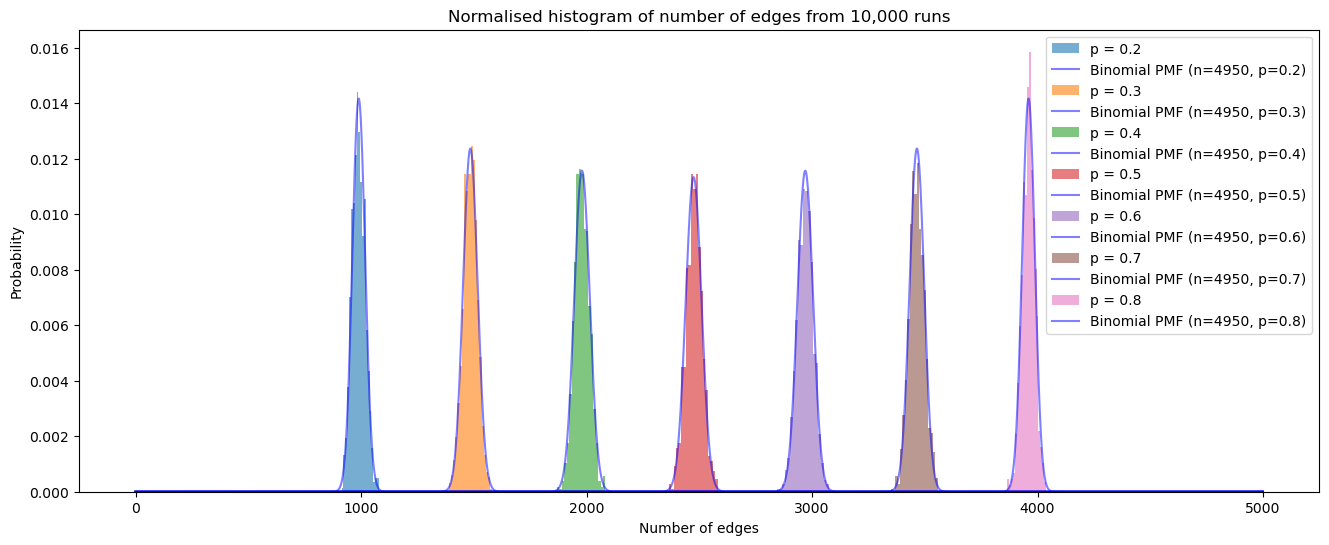

In [5]:
def sample_network(n, p, k): # n is the number of nodes and p is the probability of an edge existing between two nodes
    network = Network(n) #This is an instance of the network class, initialized with n nodes
    for i in range(n): # Any way to remove double for loop? -> This is the goal of task 5
        for j in range(i+1, n):
            if random() <= p:
                network.add_edge(i, j)
    # print number of edges
    m = len(network.edge_list())
    #print adjacency matrix 
    if k == True:
        network.print_adjacency_matrix()
        print("m = " + str(m))
    return m

def sample_network_RN(n, p, k):
    network = Network(n) #This is an instance of the network class, initialized with n nodes
    for i in range(n): # Any way to remove double for loop? -> This is the goal of task 5
        for j in range(i+1, n):
            if random() <= p:
                network.add_edge(i, j)
    # print number of edges
    m = len(network.edge_list())
    #print adjacency matrix 
    if k == True:
        network.print_adjacency_matrix()
        print("m = " + str(m))
    return network

#plot normalised histogram 
p_values = [0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
x = np.arange(0, 5000)
plt.figure(figsize=(16, 6))
# Calculate the binomial probabilities

# The total number of edges, m, will thus be a random variable. Plot a histogram of m for a large number of runs with n = 100 and various values of p ∈ (0, 1).
for p in p_values:
    m_values = []
    binom_probs = binom.pmf(x, 4950, p)
    for i in range(1000):
        m = sample_network(100, p, False)
        m_values.append(m)
    plt.hist(m_values, bins=20, density=True, alpha=0.6, label='p = '+str(p))
    plt.plot(x, binom_probs, '-', ms=1,label=f'Binomial PMF (n={4950}, p={p})', color='blue', alpha=0.5)
# plt.legend(loc='upper center', fontsize = "x-small") # to put legend in centre top of the plot use loc = upper centre and to make the size small use 
plt.xlabel('Number of edges')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.title('Normalised histogram of number of edges from 10,000 runs')
plt.show()



    

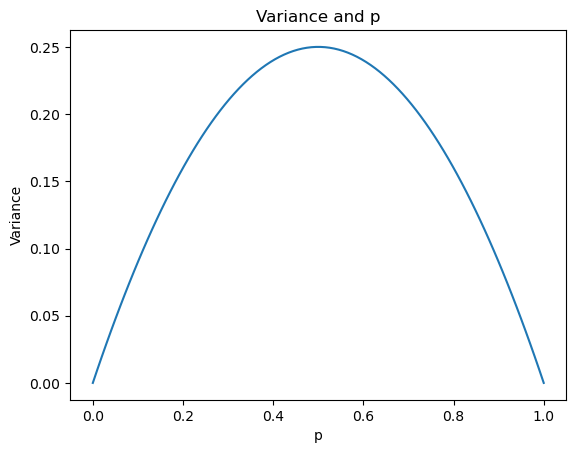

True
0 1 0 1 0 1 0 0 0 0
1 0 0 0 1 1 1 1 0 1
0 0 0 0 0 0 1 1 0 1
1 0 0 0 1 1 1 0 0 1
0 1 0 1 0 0 0 0 1 0
1 1 0 1 0 0 1 1 1 0
0 1 1 1 0 1 0 1 1 0
0 1 1 0 0 1 1 0 0 0
0 0 0 0 1 1 1 0 0 1
0 1 1 1 0 0 0 0 1 0
m = 22
{0: {1, 3, 5}, 1: {0, 4, 5, 6, 7, 9}, 2: {9, 6, 7}, 3: {0, 4, 5, 6, 9}, 4: {8, 1, 3}, 5: {0, 1, 3, 6, 7, 8}, 6: {1, 2, 3, 5, 7, 8}, 7: {1, 2, 5, 6}, 8: {9, 4, 5, 6}, 9: {8, 1, 2, 3}} {0, 4, 5, 6, 7, 9} [(0, 1), (0, 3), (0, 5), (1, 4), (1, 5), (1, 6), (1, 7), (1, 9), (2, 9), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 9), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (8, 9)]


In [4]:
#plot p(1-p)
x = np.linspace(0, 1, 100)
y = [i*(1-i) for i in x]
plt.plot(x, y)
plt.xlabel("p")
plt.ylabel("Variance")
plt.title("Variance and p")
plt.show()
k=True
if k: print(True)

network = sample_network_RN(10, 0.5, True)
print(network.adj, network.neighbors(1), network.edge_list())

<span style="color:pink">**Task 2**</span>: The theoretical distribution given by $$P(m) = \binom{\binom{n}{2}}{m} p^m (1 - p)^{\left(\binom{n}{2} - m\right)}$$ has an expected value of $\binom{n}{2}p$ and a variance of $\binom{n}{2}p(1-p)$. This aligns well with the histogram produced above, for $n=100$, and $p$ ranging from 0 to 1.

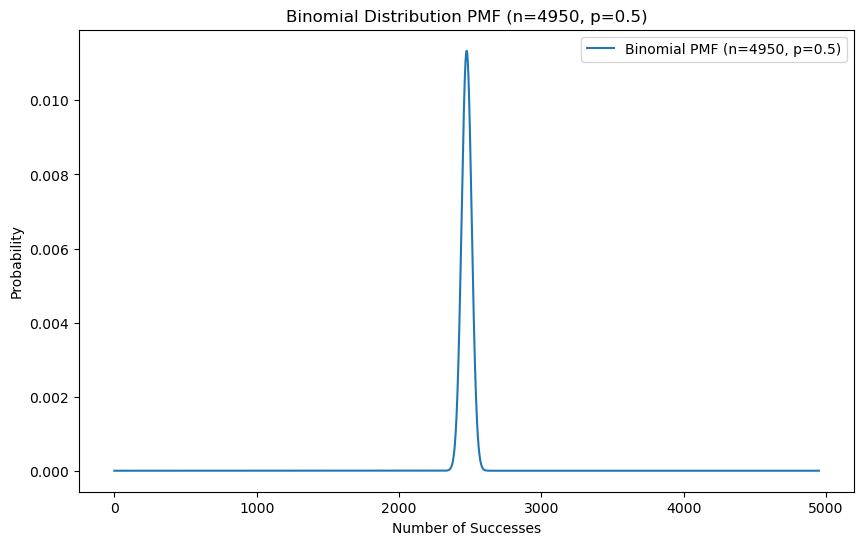

In [5]:
from scipy.stats import binom
n = 4950  # 100 choose 2
p = 0.5

# Create a range of values from 0 to n
x = np.arange(0, n + 1)

# Calculate the binomial probabilities
binom_probs = binom.pmf(x, n, p)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(x, binom_probs, '-', ms=1,label=f'Binomial PMF (n={n}, p={p})')
plt.title(f'Binomial Distribution PMF (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.show()

<span style="color:pink">**Task 3**</span>: The previous task involved P(m) the probability of the total number of edges. We are now looking for 
P(k), the probability that a *node* has exactly k edges.

There are N-1 other nodes which connections can be made to, each with probability p.

Hence $P(k) = \binom{(n-1)}{k} p^k(1-p)^{n-1-k}$

$$E(k) = (n-1)p$$

<span style="color:pink">**Task 4**</span>: In this exercise, we consider $G(n, \frac{\lambda}{n-1})$, for which $p = \lambda/(n-1)$. Using the above relations, the expected degree:

$$E(k) = (n-1)p = \lambda$$

This is clearly independent of $n$. The variance is 

$$Var(G) = \lambda (1-\frac{\lambda}{n-1})$$

Using the expression for node degree probability, we obtain:

$$P(k) = \binom{(n-1)}{k} (\lambda/(n-1))^k(1-(\lambda/(n-1)))^{n-1-k}$$
$$\lim_{n \to \infty} P(k) = \lim_{n \to \infty} \binom{(n-1)}{k} (\lambda/(n-1))^k(1-(\lambda/(n-1)))^{n-1-k}$$
$$\lim_{m \to \infty} P(k) = \lim_{m \to \infty} \binom{m}{k} (\lambda/m)^k(1-(\lambda/m))^{m-k}$$
$$ = \lim_{m \to \infty} \frac{m!}{k!(m-k)!} (\lambda/m)^k(1-(\lambda/m))^{m-k}$$
$$ = \frac{(m)(m-1)...(m-k+1)}{m^k} \frac{\lambda^k}{k!}e^{-\lambda}$$
$$ \approx \frac{\lambda^k}{k!}e^{-\lambda} $$

<span style="color:pink">**Task 5**</span>: sample_network is inefficient because it has a double for loop. We now improve this using a two step algorithm.

*Step 1:* choose a value of m to denote how many edges the network will have, according to formula $$P(m) = \binom{\binom{n}{2}}{m} p^m (1 - p)^{\left(\binom{n}{2} - m\right)}$$
*Step 2:* Given that the network will have m edges, we add these uniformly at random to the network.

In [6]:
def sample_network_improved(n, p, k):
    # This selects m according to the binomial distribution from equation (5)
    m = np.random.binomial(n*(n-1)/2, p) 
    
    # Now we add m edges to the network uniformly at random
    network = Network(n)
    for i in range(m):
        edge = sample(range(n), 2)
        network.add_edge(edge[0], edge[1])

    #print adjacency matrix
    if k == True:
        network.print_adjacency_matrix()
    return m

<span style="color:pink">**Task 6**</span>: We now have 2 functions that sample $G(n,p)$. We use *timeit* to find the runtimes of each function for ever-larger values of $n$. It seems as if the original function is better for smaller values of $n$, while the new one is significantly faster than the original one for large $n$.

n = 64
sample_network: 0.04662330000428483
sample_network_improved: 0.4641748000285588
n = 128
sample_network: 0.1522666999953799
sample_network_improved: 0.23184649995528162
n = 256
sample_network: 0.3667244999669492
sample_network_improved: 0.5111494000302628
n = 512
sample_network: 1.506121200043708
sample_network_improved: 1.5874706000322476
n = 1024
sample_network: 7.357523199985735
sample_network_improved: 3.115394100022968
Original: y = 1.7910216007534163x-10.640664580801658
Improved: y = 0.8268837162306102x-4.845570854132529


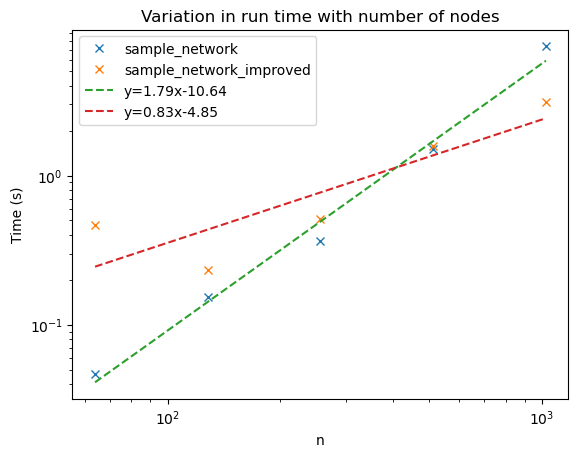

In [7]:
#now plot all of those run time values against n on a log log graph
n_values = [64, 128, 256, 512, 1024]
sample_network_times = []
sample_network_improved_times = []
for n in n_values:
    a = timeit.timeit('sample_network(n, 10/(n-1), False)', number=100, globals=globals())
    b = timeit.timeit('sample_network_improved(n, 10/(n-1), False)', number=100, globals=globals())
    print("n = " + str(n))
    print("sample_network: " + str(a))
    print("sample_network_improved: " + str(b))
    sample_network_times.append(a)
    sample_network_improved_times.append(b)
plt.loglog(n_values, sample_network_times, "x", label='sample_network')
plt.loglog(n_values, sample_network_improved_times, "x", label='sample_network_improved')
plt.xlabel('n')
plt.ylabel('Time (s)')
plt.legend()


# #plot a line of best fit and return the coefficients
coefficients = np.polyfit(np.log(n_values), np.log(sample_network_times), 1)
print("Original: y = " + str(coefficients[0]) + "x" + str(coefficients[1])) 
coefficients1 = np.polyfit(np.log(n_values), np.log(sample_network_improved_times), 1)
print("Improved: y = " + str(coefficients1[0]) + "x" + str(coefficients1[1]))

#plot these lines of best fit on the graph
plt.plot(n_values, np.exp(np.log(n_values)*coefficients[0] + coefficients[1]), "--", label='y=' + str(round(coefficients[0], 2)) + 'x' + str(round(coefficients[1], 2)))
plt.plot(n_values, np.exp(np.log(n_values)*coefficients1[0] + coefficients1[1]), "--", label='y=' + str(round(coefficients1[0], 2)) + 'x' + str(round(coefficients1[1], 2)))
plt.legend()
plt.title('Variation in run time with number of nodes')
plt.show()


Clearly, the improved function has a linear time complexity, while the original function has an almost quadratic time complexity, as seen by the gradient coeffients of the line of best-fit.

Task 7: This involves a Breadth First Search.


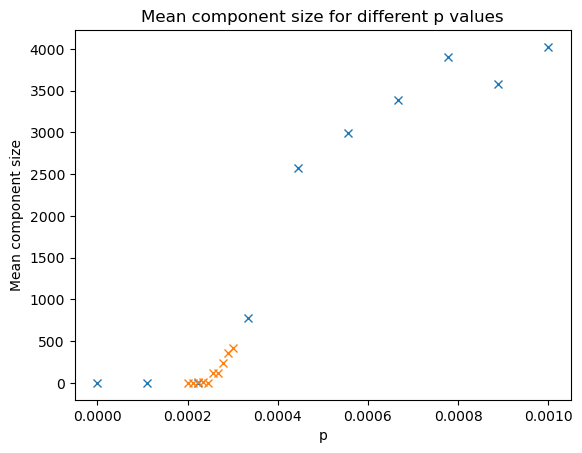

In [8]:
#Write code to find all the nodes that can be reached from node 1 efficiently. 
def reachable_nodes(network, node): # this function implements the breadth first search algorithm
    reachable = set() 
    to_check = [node]
    while len(to_check) > 0:
        current = to_check.pop() # pop the last element from the list
        reachable.add(current) # add the current node to the reachable set
        to_check += [i for i in network.neighbors(current) if i not in reachable] 
    return reachable
#This is a breadth first search becasuse 
#reachable nodes is an algorithm known as breadth first search. It is used to find all the nodes that can be reached from a given node in a graph.

#previous version of function returned m instead of the network for ease
def sample_network_improved_network(n, p, k):
    # This selects m according to the binomial distribution from equation (5)
    m = np.random.binomial(n*(n-1)/2, p) 
    
    # Now we add m edges to the network uniformly at random
    network = Network(n)
    for i in range(m):
        edge = sample(range(n), 2)
        network.add_edge(edge[0], edge[1])

    #print adjacency matrix
    if k == True:
        network.print_adjacency_matrix()
    return network

n=4096
probs = np.linspace(0, 0.001, 10) 
probs1 = np.linspace(0.0002, 0.0003, 10)
mean_component_size = []
for i in probs:
    component_sizes = []
    for j in range(20):
        #create a network and sample with probabilities in probs
        network = sample_network_improved_network(n, i, False)
        component_sizes.append(len(reachable_nodes(network, 1)))
        #plot the means
    mean_component_size.append(np.mean(component_sizes))
    
#repeat for probs1
mean_component_sizes1 = []
for i in probs1:
    component_sizes = []
    for j in range(20):
        #create a network and sample with probabilities in probs
        network = sample_network_improved_network(n, i, False)
        component_sizes.append(len(reachable_nodes(network, 1)))
        #plot the means
    mean_component_sizes1.append(np.mean(component_sizes))
plt.plot(probs, mean_component_size, "x")
plt.plot(probs1, mean_component_sizes1, "x")
plt.xlabel('p')
plt.ylabel('Mean component size')
plt.title('Mean component size for different p values')
plt.show()
    
        
    
    

At approx $p=1/(n-1)$ we see the component size change from near zero to much larger values.

<span style = "color:pink"> WEEK 2 <span>


**Task 1**: Write code to sample from the configuration model where the degrees k_i are sampled from the Poisson distribution.

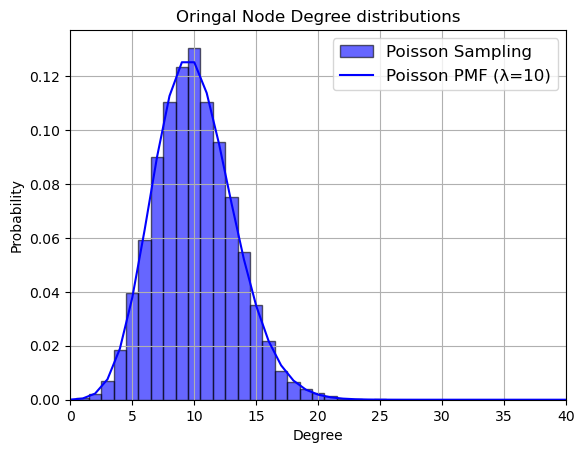

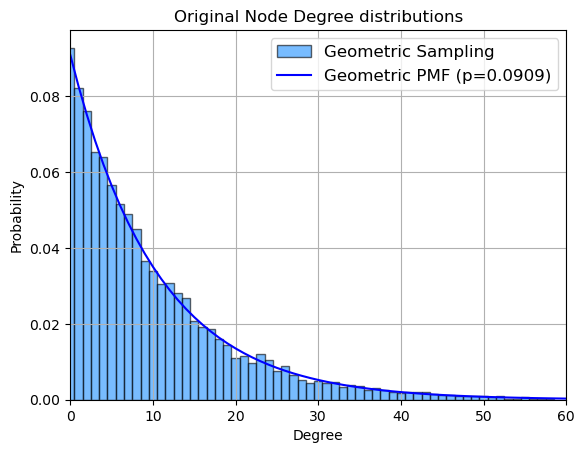

In [4]:
# Write code to sample from the configuration model where the degrees k_i are sampled from the Poisson distribution.

"""Efficient Implementation of the Configuration Model"""
#Task 2.1.1

def sample_configuration_poisson(n, lambd):
    # Step 1: Generate degree sequence from a Poisson distribution
    k = np.random.poisson(lambd, n)
    
    # Step 2: Create stubs list based on degree sequence
    stubs = np.repeat(np.arange(n), k)    
    
    # If the number of stubs is odd, remove one stub to make it even
    if len(stubs) % 2 == 1:
        stubs = stubs[:-1]
    
    # Step 3: Shuffle stubs to randomize pairing
    np.random.shuffle(stubs)
    
    # Step 4: Initialize the network
    network = Network(n)
    
    # Step 5: Pair stubs and create edges, ensuring no duplicate edges or self-loops
    for i in range(0, len(stubs), 2):
        u, v = stubs[i], stubs[i + 1]
        if u != v:
            edge = tuple(sorted((u, v)))  
            network.add_edge(edge[0], edge[1])
    
    return network

#Task 2.1.2

def sample_configuration_geometric(n, p):
    # Step 1: Generate degree sequence using the geometric distribution (adjusted)
    k = np.random.geometric(p, n) - 1  # Adjust to match the required geometric distribution
    # Step 2: Create stubs list based on degree sequence
    stubs = np.repeat(np.arange(n), k)
    
    # If the number of stubs is odd, remove one stub to make it even
    if len(stubs) % 2 == 1:
        stubs = stubs[:-1]
    
    # Step 3: Shuffle stubs to randomize pairing
    np.random.shuffle(stubs)
    
    # Step 4: Initialize the network
    network = Network(n)
    
    # Step 5: Pair stubs and create edges, including duplicate edges or self-loops
    for i in range(0, len(stubs), 2):
        u, v = stubs[i], stubs[i + 1]
        if u != v:
            edge = tuple(sorted((u, v)))  
            network.add_edge(edge[0], edge[1])

    
    return network

#Sample a network with 10,000 nodes and mean degree 10 
n, lambd, p = 10000, 10, 0.0909

#Verify that the degree distributions approximately match the Poisson and Geometric distributions
"""Plot Poisson and Geometric degree distributions separately"""

network_poisson = sample_configuration_poisson(n, lambd)
network_geometric = sample_configuration_geometric(n, p)
poisson_degrees = ([len(network_poisson.neighbors(i)) for i in range(n)])
geometric_degrees = ([len(network_geometric.neighbors(i)) for i in range(n)])

x = np.arange(0, 100)
poisson_probs = poisson.pmf(x, 10)
geometric_probs = (1-p)**x * p

plt.hist(poisson_degrees, bins=np.arange(40)-0.5, edgecolor='black', density=True, alpha=0.6, label='Poisson Sampling', color='blue')
plt.plot(x, poisson_probs, '-', color = 'blue', ms=1,label=f'Poisson PMF (λ={lambd})') 
plt.xlabel('Degree')
plt.xlim(0, 40)
plt.ylabel('Probability')
plt.legend(fontsize='large')
plt.grid()
plt.title('Oringal Node Degree distributions')
plt.show()

plt.hist(geometric_degrees, bins=np.arange(60)-0.5, edgecolor='black', density=True, alpha=0.6, label='Geometric Sampling', color='dodgerblue')
plt.plot(x, geometric_probs, '-', color = 'blue', ms=1,label=f'Geometric PMF (p={p})')
plt.xlabel('Degree')
plt.xlim(0, 60)
plt.ylabel('Probability')
plt.legend(fontsize='large')
plt.grid()
plt.title('Original Node Degree distributions')
plt.show()


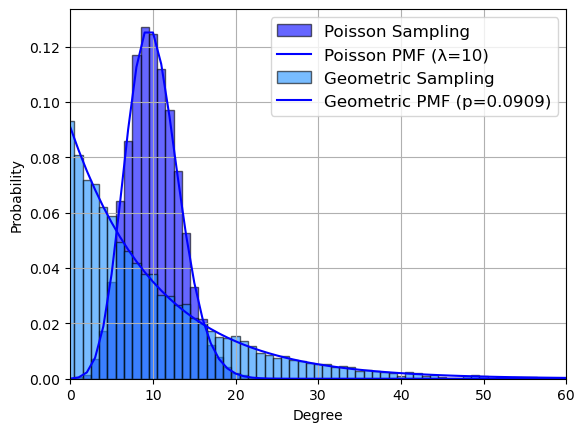

In [10]:
#Plot the same as above but overlap the two distributions
plt.hist(poisson_degrees, bins=np.arange(40)-0.5, edgecolor='black', density=True, alpha=0.6, label='Poisson Sampling', color='blue')
x = np.arange(0, 100)
plt.plot(x, poisson_probs, '-', color = 'blue', ms=1,label=f'Poisson PMF (λ={lambd})')
x = np.arange(0, 100)
plt.hist(geometric_degrees, bins=np.arange(60)-0.5, edgecolor='black', density=True, alpha=0.6, label='Geometric Sampling', color='dodgerblue')
plt.plot(x, geometric_probs, '-', color = 'blue', ms=1,label=f'Geometric PMF (p={p})')
plt.xlabel('Degree')
plt.xlim(0, 60)
plt.ylabel('Probability')
plt.legend(fontsize='large')
plt.grid()
# plt.title('Original Node Degree distributions')
plt.show()

**Week 2: Task 2**

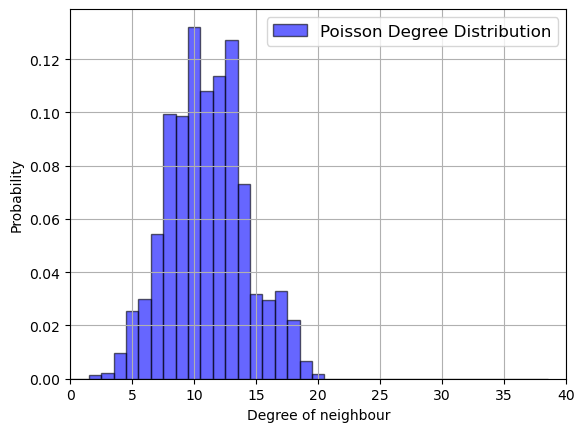

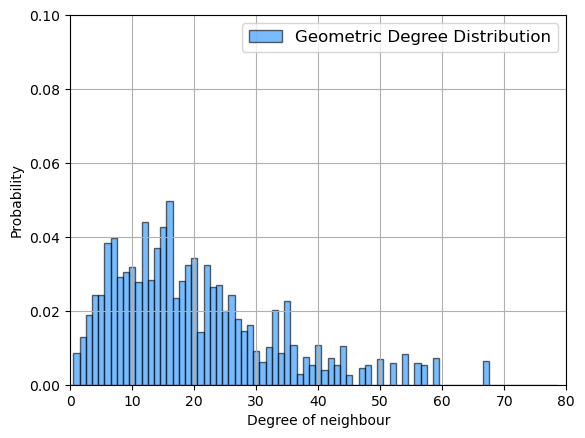

Poisson Distribution Neighbour Average Degree11.0247
Geometric Distribution Neighbour Average Degree20.42082143641555


In [11]:
#verify the friendship paradox numerically

#Task 2.2.1
N = 1000
n = N

network = sample_configuration_poisson(n, 10)
network1 = sample_configuration_geometric(n, 0.091)

def histogram_of_neighbours(network, n, distribution, bins, color):
    degrees=[]
    for i in range(10000):
        #choose a random node from 0 to n-1
        node = np.random.randint(0, n)
        # choose a neighbour of the node
        neighbours = network.neighbors(node)
        try:
            neighbour = np.random.choice(list(neighbours))
        except:
            continue
        degrees.append(len(network.neighbors(neighbour)))
    #histogram of the degrees of the neighbours
    plt.hist(degrees, bins=bins, edgecolor='black', density=True, alpha=0.6, label=distribution, color=color)

histogram_of_neighbours(network, n, 'Poisson Degree Distribution', np.arange(40)-0.5, color='blue')
plt.xlim(0, 40)
plt.xlabel('Degree of neighbour')
plt.ylabel('Probability')
# plt.title('Histogram of degrees of neighbours')
plt.grid()
plt.legend(fontsize='large')
plt.show()

histogram_of_neighbours(network1, n, 'Geometric Degree Distribution', np.arange(80)-0.5, color='dodgerblue')
plt.xlim(0, 80)
plt.ylim(0, 0.1)
plt.xlabel('Degree of neighbour')
plt.ylabel('Probability')
# plt.title('Histogram of degrees of neighbours')
plt.grid()
plt.legend(fontsize='large')
plt.show()

#find the average degree of the neighbours from the histogram
def average_degree_of_neighbours(network, n):
    degrees=[]
    for i in range(10000):
        #choose a random node from 0 to n-1
        node = np.random.randint(0, n)
        # choose a neighbour of the node
        neighbours = network.neighbors(node)
        try:
            neighbour = np.random.choice(list(neighbours))
        except:
            #retry with a different node
            continue
        degrees.append(len(network.neighbors(neighbour)))
    return np.mean(degrees)

print("Poisson Distribution Neighbour Average Degree" + str(average_degree_of_neighbours(network, n)))
print("Geometric Distribution Neighbour Average Degree" + str(average_degree_of_neighbours(network1, n)))

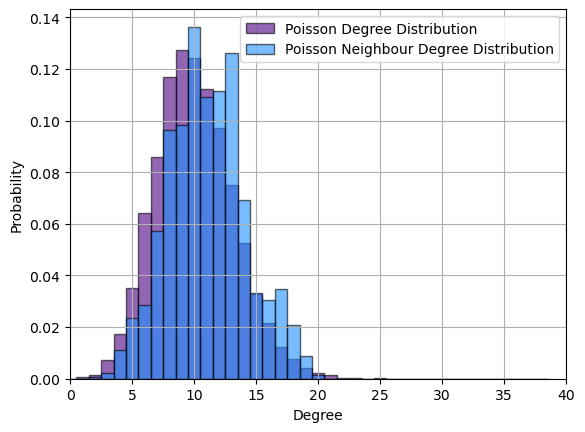

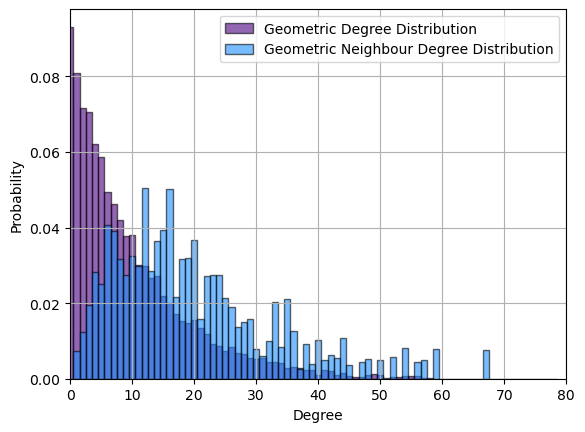

In [12]:
#Overlay the Poisson degree distribution histogram with the poisson neighbour degree distribution histogram
x = np.arange(0, 100)
poisson_probs = poisson.pmf(x, 10)
plt.hist(poisson_degrees, bins=np.arange(40)-0.5, edgecolor='black', density=True, alpha=0.6, label='Poisson Degree Distribution', color='indigo')
histogram_of_neighbours(network, n, 'Poisson Neighbour Degree Distribution', np.arange(40)-0.5, color='dodgerblue')
plt.xlim(0, 40)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.legend(fontsize='medium')
plt.grid()
# plt.title('Comparison of Degree distributions')
plt.show()

#Overlay the Geometric degree distribution histogram with the geometric neighbour degree distribution histogram
x = np.arange(0, 100)
geometric_probs = (1-p)**x * p
plt.hist(geometric_degrees, bins=np.arange(60)-0.5, edgecolor='black', density=True, alpha=0.6, label='Geometric Degree Distribution', color='indigo')
histogram_of_neighbours(network1, n, 'Geometric Neighbour Degree Distribution', np.arange(80)-0.5, color='dodgerblue')
plt.xlim(0, 80)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.legend(fontsize='medium')
plt.grid()
# plt.title('Comparison of Degree distributions')
plt.show()



**Week 2: Task 3**

Mean of Poisson Distribution is 0.781
Mean of Geometric Distribution is 8.302475780409042


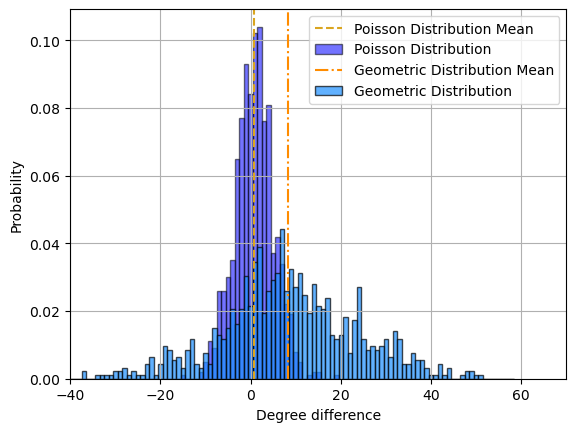

In [13]:
#plot the histogram of delta_i

def histogram_of_delta_i(network, n, distribution, bins, color, alpha):
    deltas = []
    for i in range(N):
        #choose a random node from 0 to n-1
        node = np.random.randint(0, n)
        # choose a neighbour of the node
        neighbours = network.neighbors(node)
        try:
            neighbour = np.random.choice(list(neighbours))
        except:
            #retry with a different node
            continue
        delta = len(network.neighbors(neighbour)) - len(neighbours)
        deltas.append(delta)
    mean = np.mean(deltas)
    if distribution == 'Poisson Distribution':
        linestyle = 'dashed'
        colorline = 'goldenrod'
    else:
        linestyle = 'dashdot'
        colorline = 'darkorange'
    plt.axvline(mean, color=colorline, linestyle=linestyle, linewidth=1.5, label=distribution + ' Mean')
    plt.hist(deltas, bins=bins, density=True, edgecolor='black', alpha=alpha, label=distribution, color = color)
    print("Mean of " + distribution + " is " + str(mean))
    

network = sample_configuration_poisson(n, 10)
network1 = sample_configuration_geometric(n, 0.091)

histogram_of_delta_i(network, n, 'Poisson Distribution', np.arange(-40, 60)-0.5, color='blue', alpha=0.55) 
histogram_of_delta_i(network1, n, 'Geometric Distribution', np.arange(-40, 60)-0.5, color='dodgerblue', alpha=0.7)

plt.xlabel('Degree difference')
plt.ylabel('Probability')
plt.legend(fontsize='medium')
plt.xlim(-40, 70)
# plt.title('Histogram of degree difference between friends and node i')
plt.grid()
    



**Week 2: Task 4**

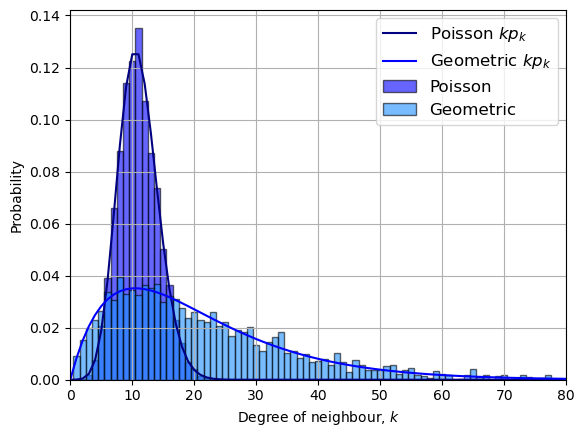

In [14]:
#histogram qk, the probability that a random neighbour of a random node has degree k
def histogram_of_qk(network, n, distribution, color):
    qk = []
    for i in range(10000):
        #choose a random node from 0 to n-1
        node = np.random.randint(0, n)
        # choose a neighbour of the node
        neighbours = network.neighbors(node)
        try:
            neighbour = np.random.choice(list(neighbours))
        except:
            #retry with a different node
            continue
        k = len(network.neighbors(neighbour))
        qk.append(k)
    plt.hist(qk, bins=np.arange(80)-0.5, edgecolor='black', density=True, alpha=0.6, label=distribution, color = color)
    
#plot theoretical kpk/sum(kpk) 
x = np.arange(0, 100)
poisson_probs = poisson.pmf(x, 10)
geometric_probs = (1-0.091)**x * 0.091
kpk_p = []
kpk_g = []
for i in x:
    kpk_p.append(i*poisson_probs[i])
    kpk_g.append(i*geometric_probs[i])
plt.plot(x, kpk_p/np.sum(kpk_p), '-', color = 'navy', ms=1,label=f'Poisson $kp_k$') 
plt.plot(x, kpk_g/np.sum(kpk_g), '-', color = 'blue', ms=1,label=f'Geometric $kp_k$')

n = 10000

network = sample_configuration_poisson(n, 10)
network1 = sample_configuration_geometric(n, 0.091)

histogram_of_qk(network, n, 'Poisson', color="blue") # to normalise, set
histogram_of_qk(network1, n, 'Geometric', color="dodgerblue")
plt.xlabel('Degree of neighbour, $k$')
plt.ylabel('Probability')
plt.xlim(0, 80)
plt.legend(fontsize='large')
# plt.title('Verifying the Relationship between $q_k$ and $p_k$')
plt.grid()
plt.show()


c:\Users\Soham Karmarkar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Soham Karmarkar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


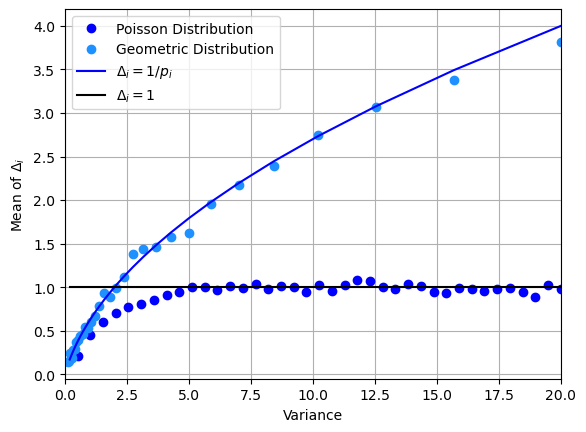

In [15]:
N = 10000
n = N
#Geometric distribution
p_list = np.linspace(0.2, 0.9, 32)
variances_g = (1-p_list)/(p_list**2)

#For each element in p_list compute the histogram of delta_i and plot the mean delta i against variances
mean_delta_i_g = []
for p in p_list:
    network = sample_configuration_geometric(n, p)
    deltas = []
    for i in range(N):
        #choose a random node from 0 to n-1
        node = np.random.randint(0, n)
        # choose a neighbour of the node
        neighbours = network.neighbors(node)
        try:
            neighbour = np.random.choice(list(neighbours))
        except:
            #retry with a different node
            continue
        delta = len(network.neighbors(neighbour)) - len(neighbours)
        deltas.append(delta)
    mean_delta_i_g.append(np.mean(deltas))
    
#repeat for poisson distribution
lambd_list = np.linspace(0, 20, 40)
variances_p = lambd_list
mean_delta_i_p = []
for lambd in lambd_list:
    network = sample_configuration_poisson(n, lambd)
    deltas = []
    for i in range(N):
        #choose a random node from 0 to n-1
        node = np.random.randint(0, n)
        # choose a neighbour of the node
        neighbours = network.neighbors(node)
        try:
            neighbour = np.random.choice(list(neighbours))
        except:
            #retry with a different node
            continue
        delta = len(network.neighbors(neighbour)) - len(neighbours)
        deltas.append(delta)
    mean_delta_i_p.append(np.mean(deltas))
    
plt.plot(variances_p, mean_delta_i_p, 'o', label='Poisson Distribution', color = "blue")
plt.plot(variances_g, mean_delta_i_g, 'o', label='Geometric Distribution', color = "dodgerblue")

p = p_list[:30]
y = 1/p - 1
var = []
delta = []
delta1 = []
for i in p_list[:30]:
    var.append((1-i)/(i**2))
    delta.append(1/i - 1)
for i in range(len(p_list[:30])):
    delta1.append(var[i]*p[i])
plt.plot(var, delta, '-', color = "blue", label='$\Delta_i = 1/p_i$')
plt.plot(var, np.ones(len(var)), '-', color = "black", label='$\Delta_i=1$')

plt.xlabel('Variance')
plt.xlim(0, 20)
plt.ylabel('Mean of $\Delta_i$')
# plt.title('Mean of delta i against variance for geometric distribution')
plt.legend()
plt.grid()
plt.show()


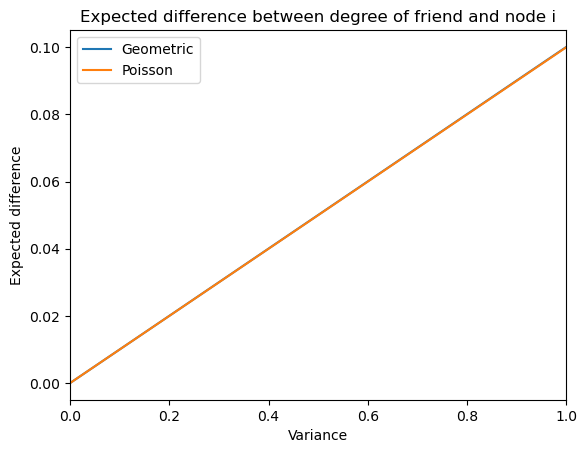

In [16]:
#Analytically it can be shown that E(q_k) - E(k) = Var(k)/E(k). Plotting this for the Poisson and Geometric distributions
#Geometric case
variances = np.linspace(0, 1, 10)
p = 0.091
lambd = 10
difference_geo = p/(1-p) * variances
difference_poiss = 1/lambd * variances

plt.plot(variances, difference_geo, label='Geometric')
plt.plot(variances, difference_poiss, label='Poisson')
plt.xlabel('Variance')
plt.ylabel('Expected difference')
plt.xlim(0, 1)
plt.legend()
plt.title('Expected difference between degree of friend and node i')
plt.show()




**Week 2: Task 5 (On Ipad)** 

**Week 2: Task 6**

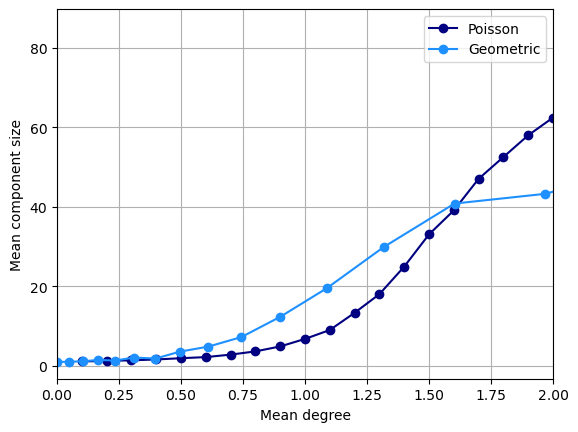

In [17]:
#Generate poisson/geomertrix graphs with mean degrees between 0 and 2
lambds = np.linspace(0.1, 2, 20)
ps = np.linspace(0.1, 1, 20)
n=100
mean_component_size = []
for i in lambds:
    component_sizes = []
    for j in range(1000):
        #create a network and sample with probabilities in probs
        network = sample_configuration_poisson(n, i)
        component_sizes.append(len(reachable_nodes(network, 2)))
        #plot the means
    mean_component_size.append(np.mean(component_sizes))
    
#repeat for probs1
mean_component_sizes1 = []
for i in ps:
    component_sizes = []
    for j in range(20):
        #create a network and sample with probabilities in probs
        network = sample_configuration_geometric(n, i) 
        component_sizes.append(len(reachable_nodes(network, 2)))
        #plot the means
    mean_component_sizes1.append(np.mean(component_sizes))

plt.plot(lambds, mean_component_size, "-o", label='Poisson', color = "navy")
plt.plot((1-ps)/ps, mean_component_sizes1, "-o", label='Geometric', color = "dodgerblue")
plt.xlabel('Mean degree')
plt.xlim(0,2)
plt.grid()
plt.ylabel('Mean component size')
# plt.title('Mean component size for different mean degrees')
plt.legend()
plt.show()


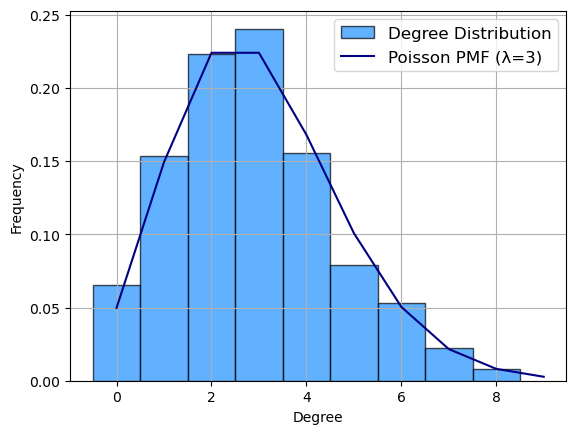

Assortativity coefficient for 100 rewirings: 0.834
Assortativity coefficient for 1000 rewirings: 0.879
Assortativity coefficient for 5000 rewirings: 0.943
Assortativity coefficient for 10000 rewirings: 0.967


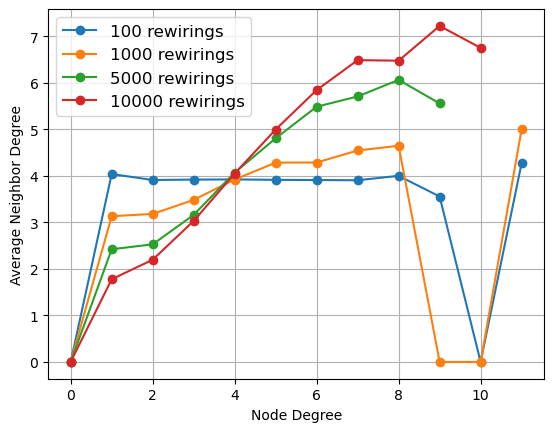

Degree correlation coefficient: 0.812


'EXPERIMENT WITH CHANGES IN CORRELATION WITH FIXED MEAN DEGREE AND HOW THAT AFFECTS THE.......'

In [18]:
#So far we assume degrees of neighbours are independent. This is not true. We can model this by sampling from the configuration model
#with a given degree distribution and then rewiring the network to add correlations between the degrees of neighbours. This can be achieved as follows
#1. Sample a network from the configuration model with a given degree distribution
#2. For each edge, rewire it with probability p. This means that the edge is removed and a new edge is added between two nodes chosen uniformly at random
#3. Repeat step 2 for all edges in the network

def correlated_sampling(n, lambd, num_rewirings):
    #Use lamda from the poisson distribution to generate the degrees in a list, k
    k = np.random.poisson(lambd, n)
    # k = np.random.geometric(lambd, n) - 1
    # print(k, k.mean())
    network = Network(n)
    S =np.array([i for i in range(n) for _ in range(k[i])])
    # print(S)
    S1 = np.random.permutation(S)
    if len(S1) % 2 == 1:
        S1 = S1[:-1]
    S1 = S1.reshape(-1, 2)
    # make edges such that nodes with high degree are more likely to be connected
    # print(network.adjacency_matrix())
    for i in S1:
        network.add_edge(i[0], i[1]) 
    for j in range(num_rewirings):
        edges = network.edge_list()
        if len(edges) < 2:
            break
        e1, e2 = sample(edges, 2)
        u1, v1 = e1
        u2, v2 = e2
        
        if len({u1, v1, u2, v2}) == 4: 
            deg_u1, deg_v1 = len(network.neighbors(u1)), len(network.neighbors(v1))
            deg_u2, deg_v2 = len(network.neighbors(u2)), len(network.neighbors(v2))

            current_diff = abs(deg_u1 - deg_v1) + abs(deg_u2 - deg_v2)
            new_diff = abs(deg_u1 - deg_u2) + abs(deg_v1 - deg_v2)

            if new_diff < current_diff:
                network.remove_edge(u1, v1)
                network.remove_edge(u2, v2)
                network.add_edge(u1, u2)
                network.add_edge(v1, v2)
    return network


def plot_degree_distribution(network):
    degrees = [len(network.neighbors(node)) for node in network.adj]
    plt.hist(degrees, bins=np.arange(0, 10) -0.5, edgecolor='black', alpha=0.7, density = True, label='Degree Distribution', color = 'dodgerblue')
    # plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()


def calculate_assortativity(network):
    degrees = [len(network.neighbors(node)) for node in network.adj]
    edges = network.edge_list()

    num, den1, den2 = 0, 0, 0 # 
    m = len(edges)
    k_sum = sum(degrees)

    #assortativity formula
    for u, v in edges: 
        deg_u = degrees[u]
        deg_v = degrees[v]
        num += deg_u * deg_v
        den1 += deg_u**2
        den2 += deg_v**2

    num = num / m
    den1 = (den1 / m) ** 0.5
    den2 = (den2 / m) ** 0.5

    return (num - (k_sum / (2 * m))**2) / (den1 * den2 - (k_sum / (2 * m))**2)


def plot_average_neighbor_degree(network):
    degrees = [len(network.neighbors(node)) for node in network.adj]
    max_degree = max(degrees)
    avg_neighbor_degree = []
    
    #similar procedure to before
    for degree in range(max_degree + 1):
        neighbors_degrees = []
        for node in network.adj:
            if len(network.neighbors(node)) == degree:
                neighbors_degrees.extend(len(network.neighbors(neighbor)) for neighbor in network.neighbors(node))
        if neighbors_degrees:
            avg_neighbor_degree.append(np.mean(neighbors_degrees))
        else:
            avg_neighbor_degree.append(0)
    
    plt.plot(range(max_degree + 1), avg_neighbor_degree, '-o')
    # plt.title("Average Neighbor Degree vs. Node Degree")
    plt.xlabel("Node Degree")
    plt.ylabel("Average Neighbor Degree")
    

def degree_correlation_coefficient(network):
    degrees = [len(network.neighbors(node)) for node in network.adj]
    edges = network.edge_list()
    
    degree_pairs = [(degrees[u], degrees[v]) for u, v in edges]
    degrees_u, degrees_v = zip(*degree_pairs)
    
    correlation_coefficient = np.corrcoef(degrees_u, degrees_v)[0, 1]
    return correlation_coefficient

# Parameters
n, lambd, p, num_rewirings = 1000, 3, 0.5, 100

# Generate network
network = correlated_sampling(n, lambd, num_rewirings)

# Plot degree distribution
plot_degree_distribution(network)
#plot the theoretical poisson distribution mean 3
x = np.arange(0, 10)
poisson_probs = poisson.pmf(x, 3)
plt.plot(x, poisson_probs, '-', ms=1,label=f'Poisson PMF (λ={lambd})', color = "navy")
plt.legend(fontsize='large')
plt.show()

#plot average neighbour degree vs node degree for multiple numbers of rewirings
num_rewirings = [100, 1000,5000, 10000]
for num_rewirings in num_rewirings:
    network = correlated_sampling(n, lambd, num_rewirings)
    plot_average_neighbor_degree(network)
    assortativity = calculate_assortativity(network)
    print(f"Assortativity coefficient for {num_rewirings} rewirings: {assortativity:.3f}")
plt.legend(['100 rewirings', '1000 rewirings', '5000 rewirings', '10000 rewirings'], fontsize='large')
plt.grid()
plt.show()


# Calculate and print degree correlation coefficient
degree_corr_coeff = degree_correlation_coefficient(network)
print(f"Degree correlation coefficient: {degree_corr_coeff:.3f}")

""" CONSIDER CREATING A MODEL WHERE YOU SPLIT THE NODES INTO TWO GROUPS: POPULAR AND UNPOPULAR. FORM CONNECTIONS INSIDE THESE AND BETWEEN THE GROUPS"""
"""EXPERIMENT WITH CHANGES IN CORRELATION WITH FIXED MEAN DEGREE AND HOW THAT AFFECTS THE......."""



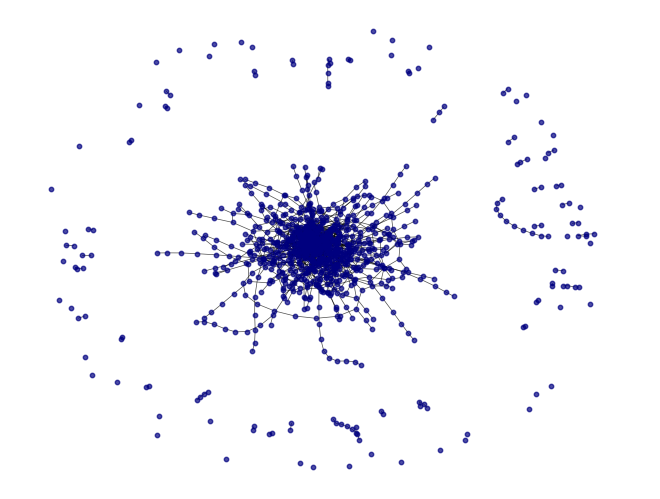

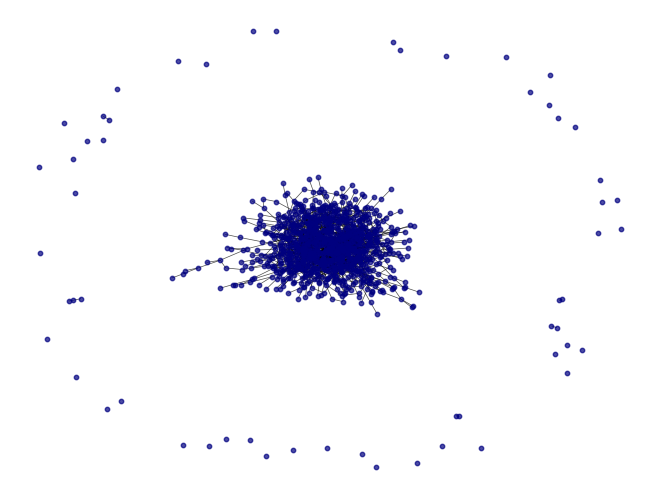

In [19]:

#To visualise the network, we can use the networkx library.

import networkx as nx

network = correlated_sampling(1000, 3, 10000)
def plot_network(network):
    G = nx.Graph()
    G.add_nodes_from(network.adj.keys())
    G.add_edges_from(network.edge_list())
    nx.draw(G, with_labels=False, node_size=10, pos=nx.spring_layout(G), node_color='navy', edge_color='black', alpha=0.7, width=0.5)
    plt.show()
    
plot_network(network)

network = correlated_sampling(1000, 3, 100)
def plot_network(network):
    G = nx.Graph()
    G.add_nodes_from(network.adj.keys())
    G.add_edges_from(network.edge_list())
    nx.draw(G, with_labels=False, node_size=10, pos=nx.spring_layout(G), node_color='navy', edge_color='black', alpha=0.7, width=0.5)
    plt.show()
    
plot_network(network)


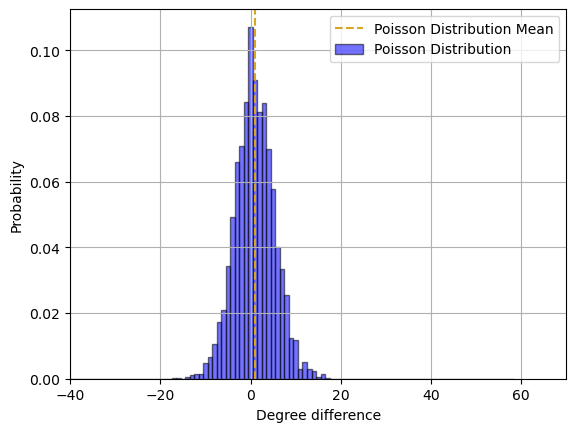

In [20]:
#Let delta_i = degree of friends - degree of node i

#plot the histogram of delta_i

def histogram_of_delta_i(network, n, distribution, bins, color, alpha):
    deltas = []
    for i in range(N):
        #choose a random node from 0 to n-1
        node = np.random.randint(0, n)
        # choose a neighbour of the node
        neighbours = network.neighbors(node)
        try:
            neighbour = np.random.choice(list(neighbours))
        except:
            #retry with a different node
            continue
        delta = len(network.neighbors(neighbour)) - len(neighbours)
        deltas.append(delta)
    mean = np.mean(deltas)
    if distribution == 'Poisson Distribution':
        linestyle = 'dashed'
        colorline = 'goldenrod'
    else:
        linestyle = 'dashdot'
        colorline = 'darkorange'
    plt.axvline(mean, color=colorline, linestyle=linestyle, linewidth=1.5, label=distribution + ' Mean')
    plt.hist(deltas, bins=bins, density=True, edgecolor='black', alpha=alpha, label=distribution, color = color)

network = correlated_sampling(n, 10, 1000)
# network1 = sample_configuration_geometric(n, 0.091)

histogram_of_delta_i(network, n, 'Poisson Distribution', np.arange(-40, 60)-0.5, color='blue', alpha=0.55) 
# histogram_of_delta_i(network1, n, 'Geometric Distribution', np.arange(-40, 60)-0.5, color='dodgerblue', alpha=0.7)

#calculate mean  of histograms and plot a vertical line at the mean


plt.xlabel('Degree difference')
plt.ylabel('Probability')
plt.legend(fontsize='medium')
plt.xlim(-40, 70)
# plt.title('Histogram of degree difference between friends and node i')
plt.grid()
    



Week 2 Notes:
=================================

***Example:***

**pick a pair i<j uniformly.**

**a)** Solution 1:
u = randint(n)
v = randint(n)
j = max(u,v)
i = min(u,v)

**b)** Solution 2:
j = randint(n)
i = randint(j)

Both solutions are wrong. Solution 2 is wrong because i is dependent on j - they're not uniform and random. Solution 1 is also wrong, but probably has lower error than solution 2, despite solution 2 always being right i.e. it will always return i < j.

$n \choose 2$ pairs, so $P(i,j) = \frac{2}{n(n-1)}$

For b), $P(i,j) = 1/n * 1/j = \frac{1}{nj}$

For a), $P(i,j) = \sum_{u,v} P(u,v) \delta_{j,max(u,v)} \delta_{i,min(u,v)} =\frac{1}{n^2} \sum \delta_j \delta_i$
This equals $2/n^2$ if i,j aren't equal and $1/n^2$ if i,j are equal.


**c)** Solution 3:
u = randint(n-1) + 1
v = randint(n)
j = max(u,v)
i = randint(j)

joint is $\frac{1}{n(n-1)}\sum_u \sum_v \delta_{j, max(u,v)}$. Can prove this equals to the correct joint distribution.

---------------------------------------------------------------------------------------------

**diameter** = longest shortest path between 2 nodes. Pair of nodes as far away as possible such that the shortest distance is larger than shortest distance between any of the other nodes. The diameter of graphs tend to be very small. Random graph models tend to get this correct. In a hand-wavy manner, the diameter is roughly log (n). *excess degree distribution*: E(degree 1) = $\lambda$, E(degree 2|degree 1) = $\lambda d_1$. Using iterated expectations, E(d_2) = $\lambda^2$... etc

Hence E(d_r) = $\lambda^r \approx n$ i.e. $r \approx O log(n)$

----------------------------------------------------------------------------------------------

Can show that the random graph is a terrible model because as n increases, the chance of there being triangles in the graph falls to 0. This is unrealistic. To have s nodes and k edges, there must be at LEAST n-1 edges to form the network. If k>s, expected value of that structure in the graph goes to 0. If k=s, then expected number is a constant. If k = s-1, expected value goes to n.

2 things the random graph gets right, is that the component size is large i.e. it is "connected", and that the diameter is roughly log n. 

Power law degree models - configuration model:

Expected number of edges from one node to another is $\frac{k_b k_a}{2m-1}$ where m is the number of half edges (Stubs) and k is the degree of node a or b.

Configuration model fails to solve this problem of triangles.


Epidemic Modelling:

===============

S = susceptible
I = infectious
R = removed/recovered
S --> I --> R

$nS_t = S people$
$nI_t = I ppl$
$nR_t = R ppl$

In the next dt, probability of recovering is dt/n.
The rate at which you become infected (S-->I) = $\frac{\lambda dt}{n}$
$  1 - ( 1 - \frac{\lambda dt}{n})^{nI_t} = \lambda I_t dt$

This leads to 

$\frac{dS}{dt} = -\lambda I s$
$\frac{dI}{dt} = \lambda I s - I$
$\frac{dR}{dt} = I$

This is derived for a fully connected network structure. 




**Week 3: Diseases**
===============

SIR model with infection spread rate is $\lambda$.

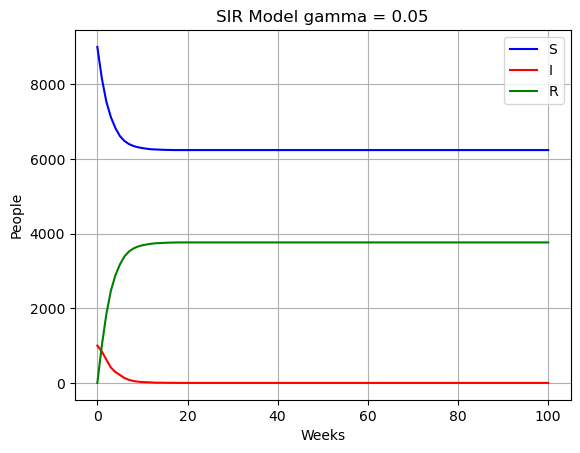

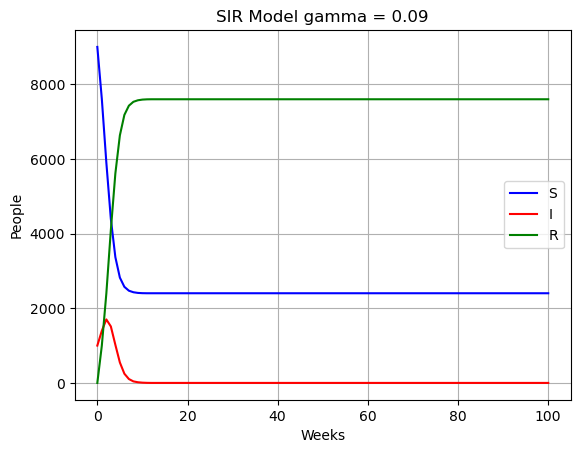

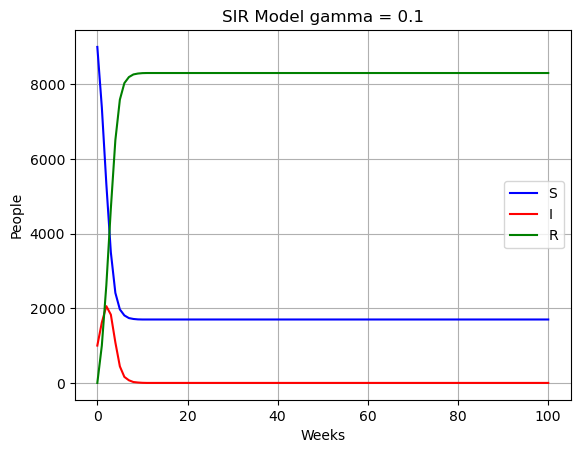

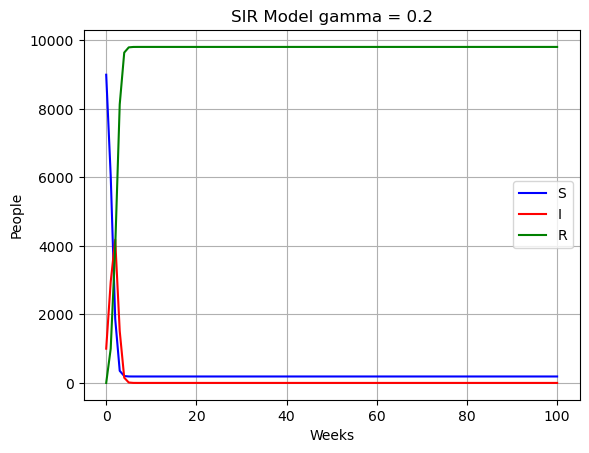

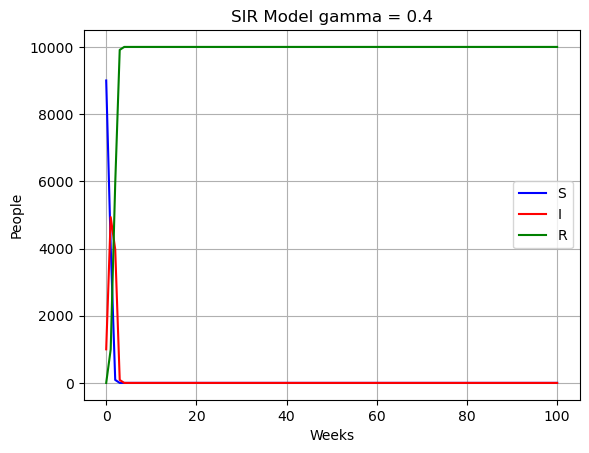

In [21]:
#Using the network class and sampling_configuration_poisson, generate an SIR process and plot the S I R values over time

def SIR_process(network, beta, gamma, num_steps):
    n = len(network.adj)
    # I = {np.random.randint(0, n): 1} # this chooses a random node to be infected and sets its value to 1 
    #choose beta*n nodes to be infected initially
    I = {i: 1 for i in sample(range(n), int(beta*n))}
    S = set(range(n)) - I.keys()
    R = {}
    S_vals = [len(S)]
    I_vals = [len(I)]
    R_vals = [len(R)]
    for _ in range(num_steps):
        new_I = set()
        new_R = set()
        for i in I:
            for j in network.neighbors(i):
                if j in S:
                    if np.random.rand() < gamma:
                        new_I.add(j)
                        S.remove(j)
                new_R.add(i)
        #remove the current node from the infected list
        I = {i: 1 for i in new_I}
        I.update({i: 1 for i in new_I}) # this updates the dictionary with the new infected nodes
        
        
        R.update({i: 1 for i in new_R})
        S_vals.append(len(S))
        I_vals.append(len(I))
        R_vals.append(len(R))
    return S_vals, I_vals, R_vals

# Parameters

#beta is the initial distribution and gamma is the infection rate
def plot_sir(n, lambd, beta, gamma, num_steps):
    network = sample_configuration_poisson(n, lambd)
    S_vals, I_vals, R_vals = SIR_process(network, beta, gamma, num_steps)
    plt.plot(S_vals, label='S', color='blue')
    plt.plot(I_vals, label='I', color='red')
    plt.plot(R_vals, label='R', color='green')
    plt.xlabel('Weeks')
    plt.ylabel('People')
    plt.legend()
    plt.title('SIR Model' + " gamma = " + str(gamma))
    plt.grid()
    plt.show()

n, lambd = 10000, 20
gammas = [0.05, 0.09,0.1, 0.2, 0.4]
for gamma in gammas:
    plot_sir(n, lambd, 0.1, gamma, 100)
 
#TRY WITH DIFFERENT MODELS


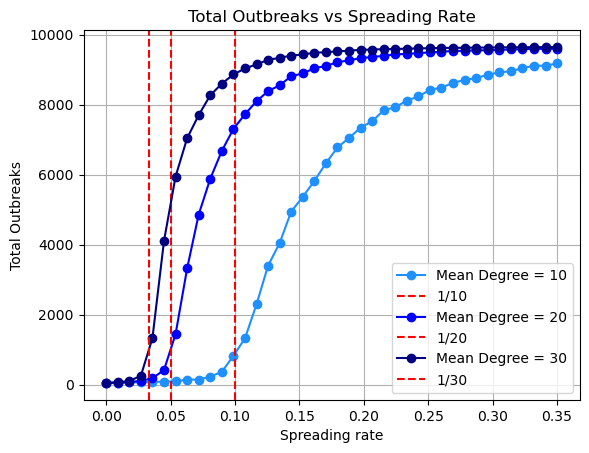

In [22]:
#Every infected node will end up in state R so once the process has ended nodes in R = number of cases in outbreak
#Simulate range of R vs Lambda
#beta is the initial distribution 
#gamma is the spreading rate
def plot_R_vs_lambda(n, lambd, beta, num_steps, trials, color):

    beta, num_steps = 0.005, 100
    network = sample_configuration_poisson(n, lambd)
    gammas = np.linspace(0, 0.35, 40)
    
    R_vals_avgs = np.zeros((trials, 40))
    for k in range(trials):
        R_vals_matrix = np.zeros((len(gammas), num_steps))
        for i in range(len(gammas)):
            _, _, R_vals = SIR_process(network, beta, gammas[i], num_steps)
            for j in range(num_steps):
                R_vals_matrix[i, j] = R_vals[j]
        R_vals_avg = np.mean(R_vals_matrix, axis=1)
        for i in range(len(R_vals_avg)):
            R_vals_avgs[k, i] = R_vals_avg[i]
    #mean of the two averages
    mean = np.mean(R_vals_avgs, axis=0)
        
        
    plt.plot(gammas, mean, "-o", color=color, label='Mean Degree = ' + str(lambd))
    #plot vertical line at 1/lambd
    plt.axvline(1/lambd, color='red', linestyle='dashed', label='1/' + str(lambd))
    plt.xlabel('Spreading rate')
    plt.ylabel('Total Outbreaks')
    plt.legend()
    plt.grid()
    plt.title('Total Outbreaks vs Spreading Rate')
    # plt.show()

plot_R_vs_lambda(10000, 10, 0.1, 40, 3, 'dodgerblue')
plot_R_vs_lambda(10000, 20, 0.1, 40, 3, 'blue')
plot_R_vs_lambda(10000, 30, 0.1, 40, 3, 'navy')
plt.show()
#lambda  * mean degree must be greater than 1 so 0.05 * 20 = 1 hence threshold is 1.
#Average over many simulations to get a smooth curve

In [152]:
def never_infected_approx(num_nodes, spread_rate, network = sample_configuration_poisson(10000, 20)):
    s = np.random.rand(10000)
    A = network.adjacency_matrix()

    lambd = spread_rate
    for iter in range(30): #originally 30
        for i in range(10000):
            counter = 1
            for neighbour in network.neighbors(i):
                counter *= (1-lambd+s[neighbour]*lambd)**A[i,neighbour]
            s[i] = counter
    return s, np.mean(s)

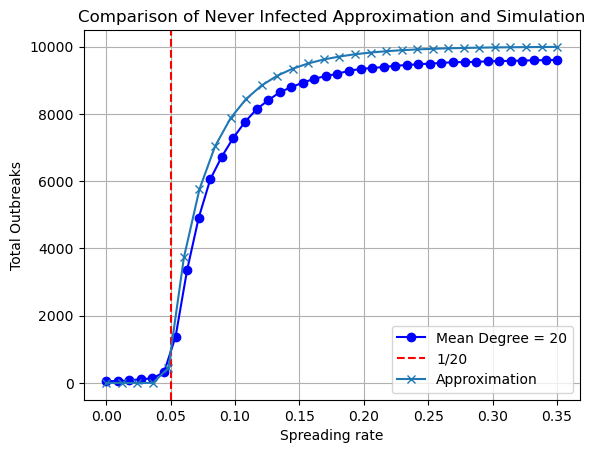

In [33]:

gammas = np.linspace(0, 0.35, 30)
s_list = []
plot_R_vs_lambda(10000, 20, 0.1, 40, 3, 'blue')
for i in range(30):
    x = never_infected_approx(10000, gammas[i])[1]
    s_list.append(1-x)
s_list=np.array(s_list)
s_list *= 10000
plt.plot(gammas, s_list, "-x", label='Approximation')
plt.legend()
plt.title("Comparison of Never Infected Approximation and Simulation")
plt.show()
    
#s_i is the probability that node i is never infected

In [25]:
#Investigate s=1
def never_infected_approx_s1(num_nodes, spread_rate):
    s = np.ones(10000)
    network = sample_configuration_poisson(10000, 20)
    A = network.adjacency_matrix()

    lambd = spread_rate
    for iter in range(30):
        for i in range(10000):
            counter = 1
            for neighbour in network.neighbors(i):
                counter *= (1-lambd+s[neighbour]*lambd)**A[i,neighbour]
            s[i] = counter
    return s
s = never_infected_approx_s1(10000, 0.10)
print(s)

#S = 1 always returns a vector of all 1s


[1. 1. 1. ... 1. 1. 1.]


In [35]:
# use power iteration to find the largest eigval because the network is too large to compute the eigvals
def power_iteration(A, num_iter):
    n = A.shape[0]
    x = np.random.rand(n)
    for i in range(num_iter):
        x = A @ x
        x = x / np.linalg.norm(x)
    return np.linalg.norm(A @ x)
network = sample_configuration_poisson(10000,20)
A = network.adjacency_matrix()
lambda_c =(1/power_iteration(A, 10))
print(lambda_c)
#This is a very accurate figure for the epidemic threshold

0.04760972781192125


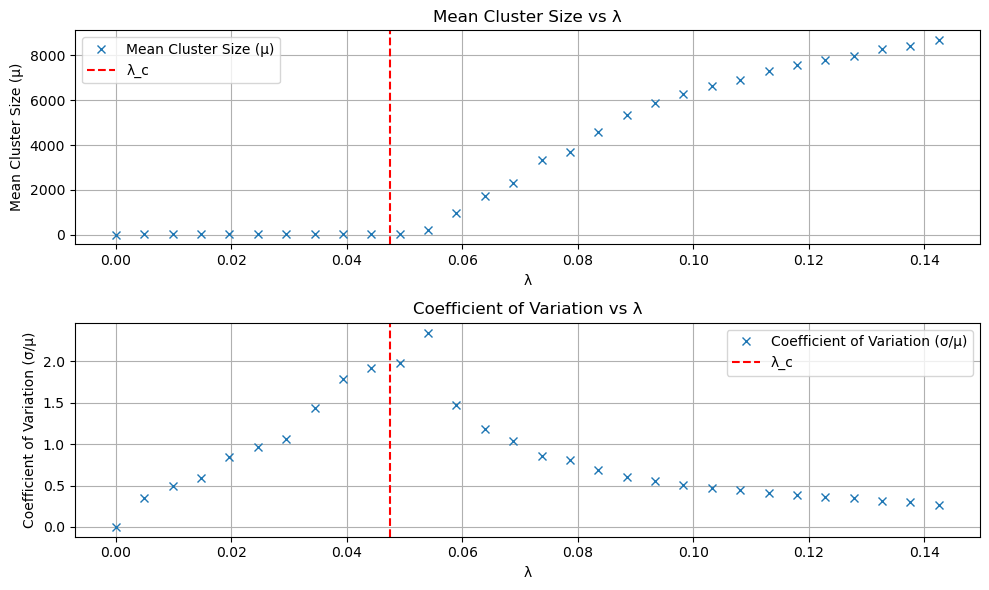

In [ ]:


# Define the graph (example adjacency list)
# This should be replaced with the actual graph adjacency list
edges = network.edge_list()  # Example edges
n = 10000  # Number of nodes
lambda_c = 1 / power_iteration(A, 100)  # Critical value of lambda (lambda_c)
# Function to estimate the cluster sizes
def estimate_cluster_sizes(edges, n, lambdas):
    mean_cluster_sizes = []
    coeff_of_variation = []

    for lam in lambdas:
        # Initialize the disjoint set
        C = DisjointSet(range(n))

        # Merge nodes with probability lambda
        for i, j in edges:
            if np.random.rand() < lam:
                C.merge(i, j)

        # Calculate the cluster sizes
        cluster_sizes = [C.subset_size(i) for i in range(n)] #each element in this list is a component size
        
        mean_cluster_size = np.mean(cluster_sizes)
        std_cluster_size = np.std(cluster_sizes)
        
        mean_cluster_sizes.append(mean_cluster_size)
        coeff_of_variation.append(std_cluster_size / mean_cluster_size if mean_cluster_size != 0 else 0)

    return mean_cluster_sizes, coeff_of_variation

# Critical value of lambda (lambda_c)

# Range of lambda values
lambdas = np.linspace(0, 3 * lambda_c, 30)

# Estimate cluster sizes
mean_cluster_sizes, coeff_of_variation = estimate_cluster_sizes(edges, n, lambdas)

# Plot results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(lambdas, mean_cluster_sizes, 'x', label='Mean Cluster Size (μ)')
plt.axvline(lambda_c, color='red', linestyle='dashed', label='λ_c')
plt.xlabel('λ')
plt.ylabel('Mean Cluster Size (μ)')
plt.title('Mean Cluster Size vs λ')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(lambdas, coeff_of_variation, 'x', label='Coefficient of Variation (σ/μ)')
plt.axvline(lambda_c, color='red', linestyle='dashed', label='λ_c')
plt.xlabel('λ')
plt.ylabel('Coefficient of Variation (σ/μ)')
plt.title('Coefficient of Variation vs λ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


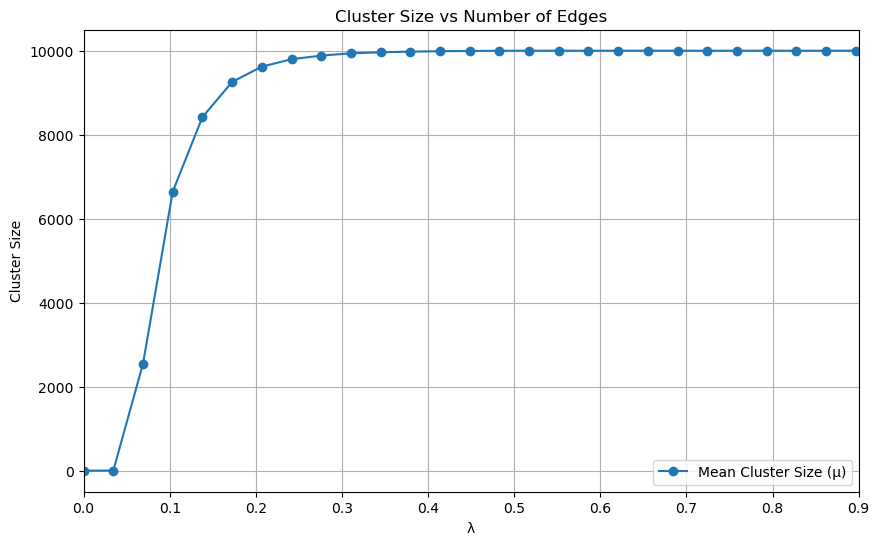

In [17]:
def average_cluster_sizes(network, q, n=10000, p=30):
    disjoint_set = DisjointSet(range(n))
    mean_cluster_sizes = []
    standard_deviation_of_cluster_sizes = []
    edges=network.edge_list()
    np.random.shuffle(edges) # make edge order random to avoid bias in the results
    
    for i in range(0, len(edges), q):
        chunk = edges[i:i+q] #take q edges at a time and merge them
        for edge in chunk:
            disjoint_set.merge(edge[0], edge[1])
        #now obtain the component sizes having added q edges
        cluster_sizes = [disjoint_set.subset_size(i) for i in range(n)]
        #this is equivalent to a new lambda value because we have added q edges i.e. 
        #lambda controlled the probability of merging edges and now we are only merging
        #a fixed number of edges at a time.
        #When we have merged all of them, lambda will be one because every node will be infected
        #and the component sizes will be the same as the number of nodes
        mean_cluster_sizes.append(np.mean(cluster_sizes))
        standard_deviation_of_cluster_sizes.append(np.std(cluster_sizes))
        
    lambdas = np.linspace(0, 1, p)
    clambda = np.zeros(p)
    m = len(mean_cluster_sizes)
    # m = len(edges)
    for j in range(len(clambda)): 
        for k in range(m):
            clambda[j] += binom.pmf(k, m, lambdas[j]) * mean_cluster_sizes[k]
        
    return clambda

# Parameters
n, lambd = 10000, 20
q = 100
network = sample_configuration_poisson(n, lambd)

# Estimate cluster sizes
mean_cluster_sizes = average_cluster_sizes(network, q, n)
x = np.linspace(0, 1, len(mean_cluster_sizes))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x,mean_cluster_sizes, '-o', label='Mean Cluster Size (μ)')
plt.xlabel('λ')
plt.xlim(0, 0.9)
plt.ylabel('Cluster Size')
plt.title('Cluster Size vs Number of Edges')
plt.legend()
plt.grid()
plt.show()


Week 4: Friendships and Diseases
===

$x_i = 1 - s_i$ is the probability that a node gets infected at some point. $x_i$ is a measure of dynamic centrality.

In [157]:
#Write code to find x_i through simulation. This is a naive, simulation-based approach with poor timecomplexity.

def find_x_i(network, beta, gamma, num_steps):
    n = len(network.adj)
    I = {i: 1 for i in sample(range(n), int(beta*n))}
    S = set(range(n)) - I.keys()
    R = {}
    S_vals = [len(S)]
    I_vals = [len(I)]
    R_vals = [len(R)]
    for _ in range(num_steps):
        new_I = set()
        new_R = set()
        for i in I:
            for j in network.neighbors(i):
                if j in S:
                    if np.random.rand() < gamma:
                        new_I.add(j)
                        S.remove(j)
                new_R.add(i)
        I = {i: 1 for i in new_I} 
        I.update({i: 1 for i in new_I})
        R.update({i: 1 for i in new_R})
        # if a node is ever infected, it ends up in the R state or the I state
        
    #at the end of this loop we are left with dictionaries of the infected and recovered nodes
    #now make a list of the nodes that were infected
    #assuming all infected nodes end up in the R state at the last time_step
    
    #this tracks the number of occurrences of each node infected
    #using list comprehension 
    x_i1= [1 if i in R.keys() else 0 for i in range(n)]
    # print(x_i == x_i1)
    return x_i1
# for several trials, add the resulting x_i and divide through by # of trials to obtain the probabilities of being infected across trials

num_trials, beta, gamma, num_steps = 2000, 0.001, 0.09, 35
network = sample_configuration_poisson(10000, 20)
def trial_averaged_x_i(network, num_trials, beta, gamma, num_steps):
    for trial in range(num_trials):
        x_i = find_x_i(network, beta, gamma, num_steps) # Have computed x_i correctly - debugging checks completed
        if trial == 0:
            x_i_avg = np.array(x_i)
        else:
            x_i_avg += np.array(x_i)
    x_i_avg = x_i_avg/num_trials
    return x_i_avg

b = trial_averaged_x_i(network, num_trials, beta, gamma, num_steps)
print(b[:10])

# an improved approach could use the iterative solution for s_i and then check that both the naive solution and the iterative solution converge to each other
s_i_list = never_infected_approx(10000, 0.09, network=network)[0]
x_i_list = 1 - np.array(s_i_list)
print(np.round(x_i_list[:10], 2))

print(np.mean(b[:10]), np.mean(x_i_list))

[0.781  0.8435 0.76   0.7265 0.7215 0.7055 0.785  0.764  0.758  0.726 ]
[0.79 0.86 0.76 0.74 0.75 0.71 0.81 0.79 0.75 0.73]
0.7571 0.7455837596010891


[]

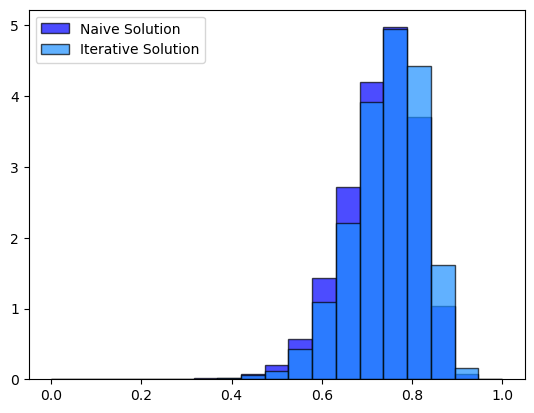

In [158]:
plt.hist(b, bins= np.linspace(0, 1, 20), edgecolor='black', alpha=0.7, label='Naive Solution', color='blue', density=True)
plt.hist(x_i_list, bins= np.linspace(0, 1, 20), edgecolor='black', alpha=0.7, label='Iterative Solution', color='dodgerblue', density=True)
plt.legend()
plt.plot()

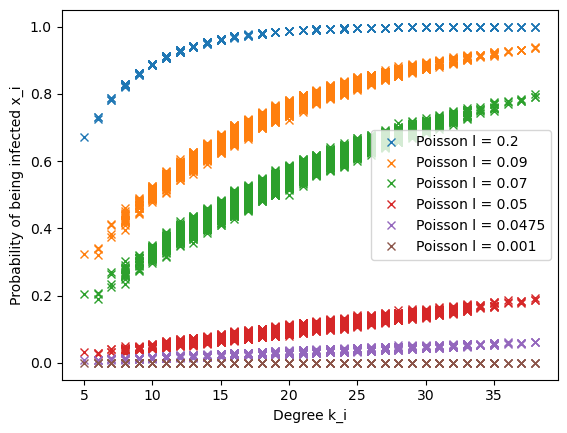

In [159]:
#Q2

#Plot x_i against k_i for a few large networks. one poisson and one geometric
def obtain_xi(network, numnodes, infection_rate, num_trials, num_steps):
    s_i_list = never_infected_approx(numnodes, infection_rate, network = network)[0]
    x_i_list = 1 - np.array(s_i_list)
    return x_i_list

def degrees(network):
    return [len(network.neighbors(node)) for node in network.adj]

network = sample_configuration_poisson(10000, 20)
degrees = degrees(network)
xis = obtain_xi(network, 10000, 0.09, 1000, 40)
xis1 = obtain_xi(network, 10000, 0.2, 1000, 40)
xis2 = obtain_xi(network, 10000, 0.001, 1000, 40)
xi3 = obtain_xi(network, 10000, 0.0475, 1000, 40)
xi4 = obtain_xi(network, 10000, 0.05, 1000, 40)
xi5 = obtain_xi(network, 10000, 0.07, 1000, 40)
plt.plot(degrees, xis1, 'x', label='Poisson l = 0.2') #48secs
plt.plot(degrees, xis, 'x', label='Poisson l = 0.09') #48secs
plt.plot(degrees, xi5, 'x', label='Poisson l = 0.07') #48secs
plt.plot(degrees, xi4, 'x', label='Poisson l = 0.05') #48secs
plt.plot(degrees, xi3, 'x', label='Poisson l = 0.0475') #48secs
plt.plot(degrees, xis2, 'x', label='Poisson l = 0.001') #48secs

plt.xlabel('Degree k_i')
plt.ylabel('Probability of being infected x_i')
plt.legend()
plt.show()

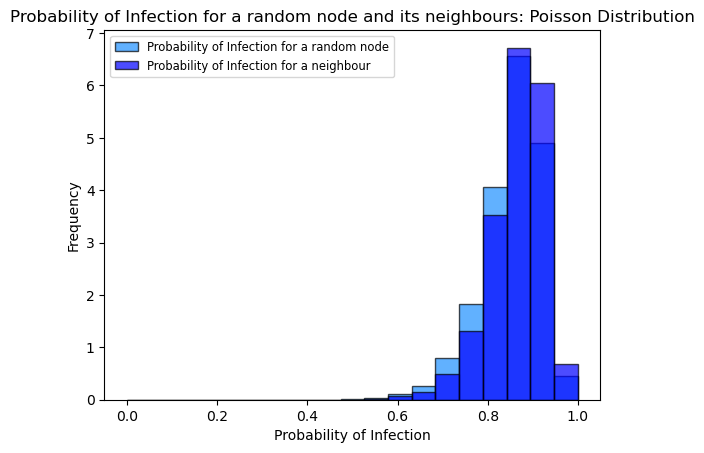

0.8516531342141843
0.8656352211811227


In [166]:
network = sample_configuration_poisson(10000, 20)
list_of_neighbour_infection_probs = []
xi5 = obtain_xi(network, 10000, 0.11, 1000, 40)
for i in range(10000):
    #randomly choose a node from network
    node = np.random.randint(0, 10000)
    #find neighbours of node
    neighbours = network.neighbors(node)
    neighbour = np.random.choice(list(neighbours))
    list_of_neighbour_infection_probs.append(xi5[neighbour])

plt.hist(xi5, bins=np.linspace(0, 1, 20) , edgecolor='black', alpha=0.7, density = True, label='Probability of Infection for a random node', color = 'dodgerblue')
plt.hist(list_of_neighbour_infection_probs, bins=np.linspace(0, 1, 20) , edgecolor='black', alpha=0.7, density = True, label='Probability of Infection for a neighbour', color = 'blue')
plt.xlabel('Probability of Infection')
plt.ylabel('Frequency')
plt.legend(fontsize = 'small', loc = 'upper left')
plt.title('Probability of Infection for a random node and its neighbours: Poisson Distribution')
plt.show()

print(np.mean(xi5))
print(np.mean(list_of_neighbour_infection_probs))

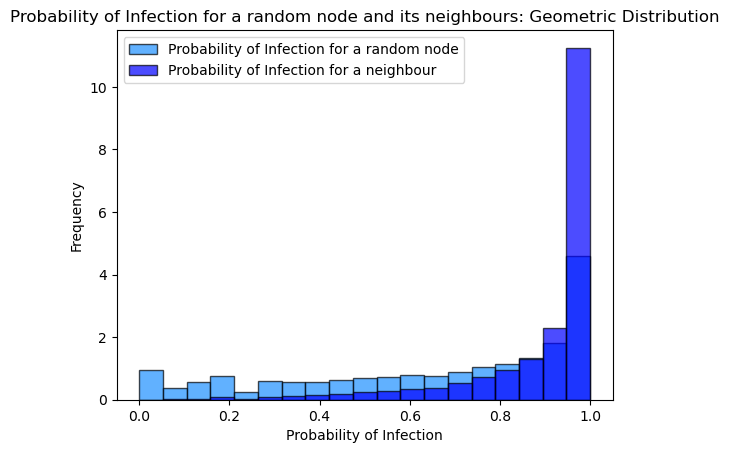

0.6631534008967154
0.896489816950403


In [167]:
#repeat for geometric distribution
network = sample_configuration_geometric(10000, 1/21)
xi5 = obtain_xi(network, 10000, 0.11, 1000, 40)
plt.hist(xi5, bins=np.linspace(0, 1, 20) , edgecolor='black', alpha=0.7, density = True, label='Probability of Infection for a random node', color = 'dodgerblue')
list_of_neighbour_infection_probs = []
for i in range(10000):
    #randomly choose a node from network
    node = np.random.randint(0, 10000)
    #find neighbours of node
    neighbours = network.neighbors(node)
    for j in neighbours:
        list_of_neighbour_infection_probs.append(xi5[j])
        
plt.hist(list_of_neighbour_infection_probs, bins=np.linspace(0, 1, 20) , edgecolor='black', alpha=0.7, density = True, label='Probability of Infection for a neighbour', color = 'blue')
plt.xlabel('Probability of Infection')
plt.ylabel('Frequency')
plt.title('Probability of Infection for a random node and its neighbours: Geometric Distribution')
plt.legend()
plt.show()

print(np.mean(xi5))
print(np.mean(list_of_neighbour_infection_probs))

In [5]:
# We now investigate herd immunity. Do this by removing nodes from the network.
#to remove from a dictionary, use the pop method. I will at random vaccinate 40% of the population

def herd_immunity(network, fraction_vaccinated):
    n = len(network.adj)
    vaccinated = sample(range(n), int(fraction_vaccinated*n))
    for node in vaccinated:
        network.remove_node(node)
    return network


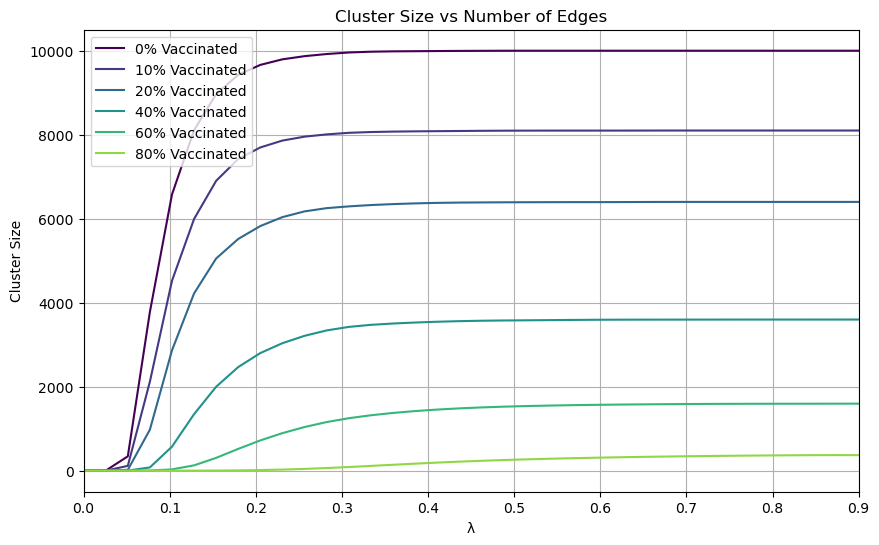

In [6]:
from matplotlib.cm import viridis
from scipy.stats import binom


def average_cluster_sizes_herd_immunity(network, q, p):
    n = len(network.adj)
    disjoint_set = DisjointSet(range(n))
    mean_cluster_sizes = []
    edges=network.edge_list()
    np.random.shuffle(edges) # make edge order random to avoid bias in the results
    
    for i in range(0, len(edges), q):
        chunk = edges[i:i+q] #take q edges at a time and merge them
        for edge in chunk:
            disjoint_set.merge(edge[0], edge[1])

        #now obtain the component sizes having added q edges
        cluster_sizes = [disjoint_set.subset_size(i) for i in range(n)]
        #this is equivalent to a new lambda value because we have added q edges i.e. 
        #lambda controlled the probability of merging edges and now we are only merging a fixed number of edges at a time. When we have merged all of them, lambda will be one because every node will be infected and the component sizes will be the same as the number of nodes
        mean_cluster_sizes.append(np.mean(cluster_sizes))
        # standard_deviation_of_cluster_sizes.append(np.std(cluster_sizes))
    
    lambdas = np.linspace(0, 1, p)
    clambda = np.zeros(p)
    m = len(mean_cluster_sizes)
    # m = len(edges)
    for j in range(len(clambda)): 
        for k in range(m):
            clambda[j] += binom.pmf(k, m, lambdas[j]) * mean_cluster_sizes[k]
        
    return clambda

# Parameters
n, lambd = 10000, 20
q = 100
vaccination_rates = [0, 0.1, 0.2, 0.4, 0.6, 0.8]
labels = ['0% Vaccinated', '10% Vaccinated', '20% Vaccinated', '40% Vaccinated', '60% Vaccinated', '80% Vaccinated']

plt.figure(figsize=(10, 6))

# Loop through each vaccination rate and plot the results
for idx, rate in enumerate(vaccination_rates):
    network = sample_configuration_poisson(n, lambd)
    network = herd_immunity(network, rate)
    
    # Estimate cluster sizes
    clambda = average_cluster_sizes_herd_immunity(network, q, 40)
    x = np.linspace(0, 1, len(clambda))
    
    # Plot results
    plt.plot(x, clambda, '-', label=labels[idx], color=viridis(idx / len(vaccination_rates)), markersize=8)

plt.xlabel('λ')
plt.xlim(0, 0.9)
plt.ylabel('Cluster Size')
plt.title('Cluster Size vs Number of Edges')
plt.legend()
plt.grid()
plt.show()

#the graph shows as vaccination rate increases, the mean cluster size decreases. This is because the number of infected nodes decreases
#herd immunity is achieved when the mean cluster size is zero. This is the point at which the infection is eradicated from the network

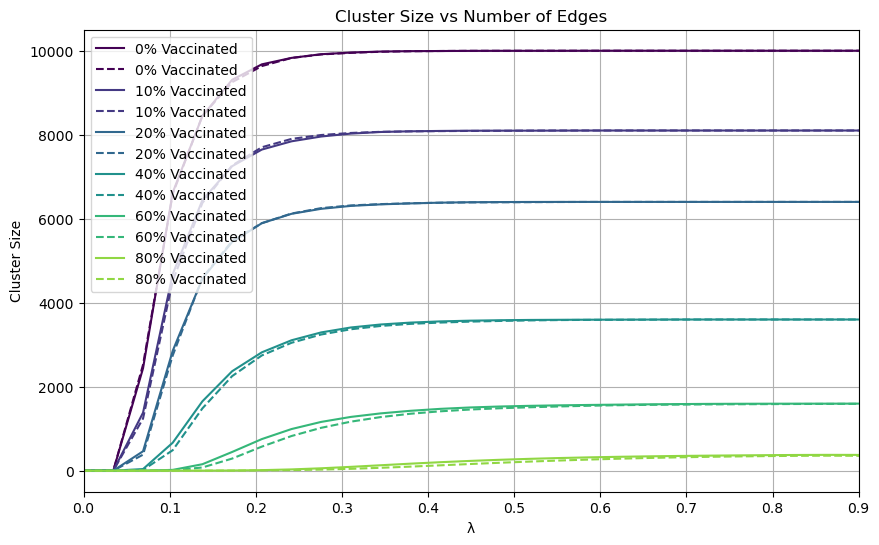

In [16]:
from matplotlib.cm import viridis
import numpy.random as random

def herd_immunity_new(network, rate):
    num_nodes = len(network.adj)
    target_vaccinated = int(rate * num_nodes)
    vaccinated = set()
    candidates = list(network.adj.keys()) 
    while len(vaccinated) < target_vaccinated and candidates:
        selected_node = random.choice(candidates)
        neighbors = list(network.neighbors(selected_node))
        if len(neighbors) > 0:
            nominated_friend = random.choice(neighbors)
            vaccinated.add(nominated_friend)
    for vaccinated_person in vaccinated:
        network.remove_node(vaccinated_person)
    return network
    
# Parameters
n, lambd = 10000, 20
q = 100
vaccination_rates = [0, 0.1, 0.2, 0.4, 0.6, 0.8]
labels = ['0% Vaccinated', '10% Vaccinated', '20% Vaccinated', '40% Vaccinated', '60% Vaccinated', '80% Vaccinated']

plt.figure(figsize=(10, 6))

# Loop through each vaccination rate and plot the results
for idx, rate in enumerate(vaccination_rates):
    network = sample_configuration_poisson(n, lambd)
    network = herd_immunity(network, rate)
    
    network_new = sample_configuration_poisson(n, lambd)
    network_new = herd_immunity_new(network_new, rate)
    
    # Estimate cluster sizes
    mean_cluster_sizes = average_cluster_sizes_herd_immunity(network, q, 30)
    x = np.linspace(0, 1, len(mean_cluster_sizes))
    mean_cluster_sizes_new = average_cluster_sizes_herd_immunity(network_new, q, 30)
    x_new = np.linspace(0, 1, len(mean_cluster_sizes_new))
    
    # Plot results
    plt.plot(x, mean_cluster_sizes, '-', label=labels[idx], color=viridis(idx / len(vaccination_rates)), markersize=8)
    plt.plot(x_new, mean_cluster_sizes_new, '--', label=labels[idx], color=viridis(idx / len(vaccination_rates)), markersize=8)
plt.xlabel('λ')
plt.xlim(0, 0.9)
plt.ylabel('Cluster Size')
plt.title('Cluster Size vs Number of Edges')
plt.legend()
plt.grid()
plt.show()

#the graph shows as vaccination rate increases, the mean cluster size decreases. This is because the number of infected nodes decreases
#herd immunity is achieved when the mean cluster size is zero. This is the point at which the infection is eradicated from the network

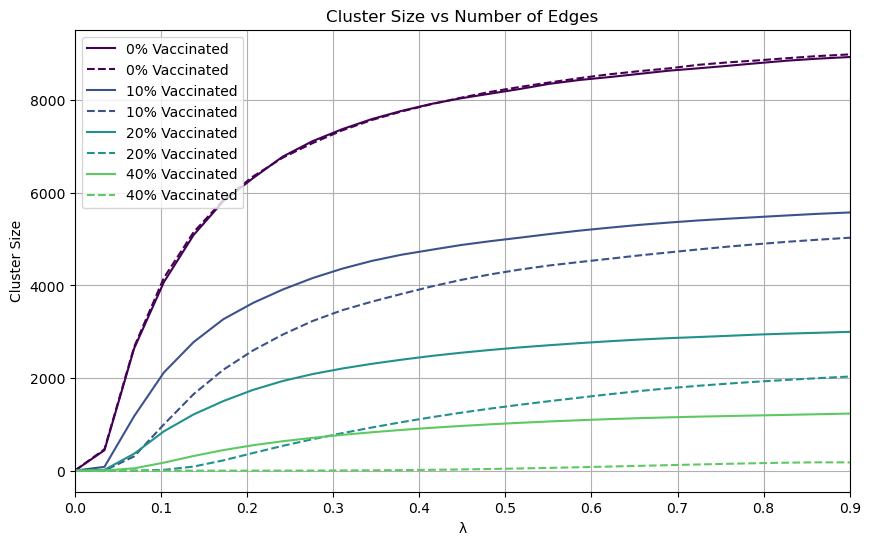

In [18]:
from matplotlib.cm import viridis

def herd_immunity_new(network, rate):
    num_nodes = len(network.adj)
    target_vaccinated = int(rate * num_nodes)
    vaccinated = set()
    candidates = list(network.adj.keys()) 
    # print("stage 1 complete")
    while len(vaccinated) < target_vaccinated and candidates:
        selected_node = random.choice(candidates)
        neighbors = list(network.neighbors(selected_node))
        # print("stage 2 complete")
        if len(neighbors) > 0:
            nominated_friend = random.choice(neighbors)
            vaccinated.add(nominated_friend)
    # print("stage 3 complete")
    for vaccinated_person in vaccinated:
        network.remove_node(vaccinated_person)
    # print("stage 4 complete")
    return network
    
# Parameters
n, lambd = 10000, 20
q = 100
# vaccination_rates = [0, 0.1, 0.2, 0.4, 0.6, 0.8]
vaccination_rates = [0, 0.2, 0.4, 0.6]
labels = ['0% Vaccinated', '10% Vaccinated', '20% Vaccinated', '40% Vaccinated', '60% Vaccinated', '80% Vaccinated']

plt.figure(figsize=(10, 6))

# Loop through each vaccination rate and plot the results
for idx, rate in enumerate(vaccination_rates):
    # network = sample_configuration_poisson(n, lambd)
    network = sample_configuration_geometric(n, 1/21)
    network = herd_immunity(network, rate)

    network_new = sample_configuration_geometric(n, 1/21)
    network_new = herd_immunity_new(network_new, rate)
    
    # Estimate cluster sizes
    mean_cluster_sizes = average_cluster_sizes_herd_immunity(network, q, 30)
    x = np.linspace(0, 1, len(mean_cluster_sizes))
    mean_cluster_sizes_new = average_cluster_sizes_herd_immunity(network_new, q, 30)
    x_new = np.linspace(0, 1, len(mean_cluster_sizes_new))
    
    # Plot results
    plt.plot(x, mean_cluster_sizes, '-', label=labels[idx], color=viridis(idx / len(vaccination_rates)), markersize=8)
    plt.plot(x_new, mean_cluster_sizes_new, '--', label=labels[idx], color=viridis(idx / len(vaccination_rates)), markersize=8)
plt.xlabel('λ')
plt.xlim(0, 0.9)
plt.ylabel('Cluster Size')
plt.title('Cluster Size vs Number of Edges')
plt.legend()
plt.grid()
plt.show()

#the graph shows as vaccination rate increases, the mean cluster size decreases. This is because the number of infected nodes decreases
#herd immunity is achieved when the mean cluster size is zero. This is the point at which the infection is eradicated from the network


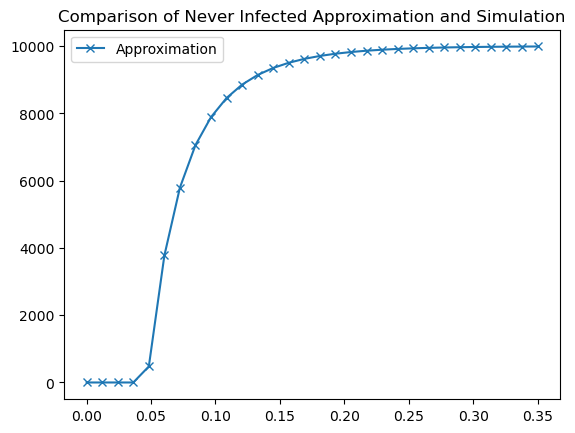

In [299]:
def never_infected_approx_m1(num_nodes, spread_rate, network = sample_configuration_poisson(10000, 20)):
    s = np.random.rand(10000)
    A = network.adjacency_matrix()
    #In this method we randomly vaccinate 40% of the population
    lambd = spread_rate
    vaccinated = sample(range(10000), int(0.4*10000))
    for iter in range(30): #originally 30
        for i in range(10000):
            counter = 1
            for neighbour in network.neighbors(i):
                if neighbour not in vaccinated:
                    counter *= (1-lambd+s[neighbour]*lambd)**A[i,neighbour]
                else:
                    counter *= 1
            s[i] = counter
    return s, np.mean(s)


gammas = np.linspace(0, 0.35, 30)
s_list = []
for i in range(30):
    x = never_infected_approx(10000, gammas[i])[1]
    s_list.append(1-x)
s_list=np.array(s_list)
s_list *= 10000


plt.plot(gammas, s_list, "-x", label='Approximation')
plt.legend()
plt.title("Comparison of Never Infected Approximation and Simulation")
plt.show()
    
#s_i is the probability that node i is never infected

In [ ]:
# For the case where randomly sampled friends are vaccinated, the vaccination strat
# is generalised by 

Networks and Misinformation
===


### <span style='color:Pink'> How do Biological Processes compare to Social Processes? <span>

1) Introduction: Describe disease spreading, misinformation spreading, significance, models.
2) Method: Produce a biological analogue model with similar parameters to compare. Discuss assumptions, modelling parameters, parallels etc.
3) Results: Produce graphs depicting and comparing relationships
4) Discussion: Explain, describe, compare contrast the models and graphs produced. Refer to a) Friendship paradox, b) Disease paradox c) threshold vs probabilistic spreading model d) centrality  e) eigenvalue analysis f) component size analysis. Answer question of comparison between the processes. Limitations of the model. Uncertainties. 
5) Conclusion

In [102]:
class Network ( object ) :
    def __init__ ( self , num_nodes ) :
        self . adj = { i :set () for i in range ( num_nodes ) }
    def add_edge ( self , i , j ) :
        self . adj [ i ]. add ( j )
        self . adj [ j ]. add ( i )
    def remove_edge ( self , i , j ) :
        self . adj [ i ]. remove ( j )
        self . adj [ j ]. remove ( i )
    def neighbors ( self , i ) :
        return self . adj [ i ]
    
    def remove_node(self, node):
        if node in self.adj:
            for neighbor in list(self.adj[node]):
                self.remove_edge(node, neighbor)
        else:
            raise ValueError("Node not found in the network.")

    def edge_list ( self ) :
        return [( i , j ) for i in self . adj for j in self . adj [ i ] if i < j ]
    def print_adjacency_matrix( self ) : 
        for i in self . adj :
            print ( ' '. join ( '1' if j in self . adj [ i ] else '0' for j in self . adj ) ) 
    def adjacency_matrix(self):
        n = len(self.adj)
        matrix = np.zeros((n,n))
        for i in range(n):
            for j in self.adj[i]:
                matrix[i][j] = 1
        return matrix
    
# Because both processes involve people, the network structure remains the same. Edge connections can be modelled by poisson or geometric for both.

# The main difference arises in the process spreading.

"""Disease"""
#Naive SIR Process for modelling disease as follows:
def SIR_process_disease(network, beta, gamma, num_steps):
    n = len(network.adj)
    # I = {np.random.randint(0, n): 1} # this chooses a random node to be infected and sets its value to 1 
    #choose beta*n nodes to be infected initially
    I = {i: 1 for i in sample(range(n), int(beta*n))}
    S = set(range(n)) - I.keys()
    R = {}
    S_vals = [len(S)]
    I_vals = [len(I)]
    R_vals = [len(R)]
    for _ in range(num_steps):
        new_I = set()
        new_R = set()
        for i in I:
            for j in network.neighbors(i):
                if j in S:
                    if np.random.rand() < gamma:
                        new_I.add(j)
                        S.remove(j)
                new_R.add(i)
        #remove the current node from the infected list
        I = {i: 1 for i in new_I}
        I.update({i: 1 for i in new_I}) # this updates the dictionary with the new infected nodes
        
        
        R.update({i: 1 for i in new_R})
        S_vals.append(len(S))
        I_vals.append(len(I))
        R_vals.append(len(R))
    return S_vals, I_vals, R_vals

#s_i is the probability of never being infected.
def get_s_i(num_nodes, spread_rate, network = sample_configuration_poisson(10000, 20)):
    s = np.random.rand(10000)
    A = network.adjacency_matrix()

    lambd = spread_rate
    for iter in range(30): #originally 30
        for i in range(10000):
            counter = 1
            for neighbour in network.neighbors(i):
                counter *= (1-lambd+s[neighbour]*lambd)**A[i,neighbour]
            s[i] = counter
    return s, np.mean(s)

#Fast implementation of SIR, computing coin flips ahead of time
def estimate_cluster_sizes(edges, n, lambdas):
    mean_cluster_sizes = []
    coeff_of_variation = []

    for lam in lambdas:
        # Initialize the disjoint set
        C = DisjointSet(range(n))

        # Merge nodes with probability lambda
        for i, j in edges:
            if np.random.rand() < lam:
                C.merge(i, j)

        # Calculate the cluster sizes
        cluster_sizes = [C.subset_size(i) for i in range(n)] #each element in this list is a component size
        
        mean_cluster_size = np.mean(cluster_sizes)
        std_cluster_size = np.std(cluster_sizes)
        
        mean_cluster_sizes.append(mean_cluster_size)
        coeff_of_variation.append(std_cluster_size / mean_cluster_size if mean_cluster_size != 0 else 0)

    return mean_cluster_sizes, coeff_of_variation

#super fast implementation using Disjoint set
def average_cluster_sizes(network, q, n=10000, p=30):
    disjoint_set = DisjointSet(range(n))
    mean_cluster_sizes = []
    standard_deviation_of_cluster_sizes = []
    edges=network.edge_list()
    np.random.shuffle(edges) # make edge order random to avoid bias in the results
    
    for i in range(0, len(edges), q):
        chunk = edges[i:i+q] #take q edges at a time and merge them
        for edge in chunk:
            disjoint_set.merge(edge[0], edge[1])
        #now obtain the component sizes having added q edges
        cluster_sizes = [disjoint_set.subset_size(i) for i in range(n)]
        #this is equivalent to a new lambda value because we have added q edges i.e. 
        #lambda controlled the probability of merging edges and now we are only merging
        #a fixed number of edges at a time.
        #When we have merged all of them, lambda will be one because every node will be infected
        #and the component sizes will be the same as the number of nodes
        mean_cluster_sizes.append(np.mean(cluster_sizes))
        standard_deviation_of_cluster_sizes.append(np.std(cluster_sizes))
        
    lambdas = np.linspace(0, 1, p)
    clambda = np.zeros(p)
    m = len(mean_cluster_sizes)
    # m = len(edges)
    for j in range(len(clambda)): 
        for k in range(m):
            clambda[j] += binom.pmf(k, m, lambdas[j]) * mean_cluster_sizes[k]
        
    return clambda

"""Misinformation"""
#Naive SMI process for modelling misinformation as follows:
#S - Susceptible to being fed misinformation
#M - Misinformed
#I - Informed
#1) PROBABILISTIC MODEL 2) THRESHOLD MODEL

"""1) Probabilistic"""
#naive misinformation model
def SMI_process_misinformation(network, beta, gamma, num_steps):
    n = len(network.adj)
    # I = {np.random.randint(0, n): 1} # this chooses a random node to be infected and sets its value to 1 
    #choose beta*n nodes to be infected initially
    M = {i: 1 for i in sample(range(n), int(beta*n))}
    S = set(range(n)) - M.keys()
    I = {}
    S_vals = [len(S)]
    M_vals = [len(M)]
    I_vals = [len(I)]
    for _ in range(num_steps):
        new_I = set()
        new_R = set()
        for i in I:
            for j in network.neighbors(i):
                if j in S:
                    if np.random.rand() < gamma:
                        new_I.add(j)
                        S.remove(j)
                new_R.add(i)
        #remove the current node from the infected list
        I = {i: 1 for i in new_I}
        I.update({i: 1 for i in new_I}) # this updates the dictionary with the new infected nodes
        
        
        I.update({i: 1 for i in new_R})
        S_vals.append(len(S))
        M_vals.append(len(M))
        I_vals.append(len(I))
    return S_vals, M_vals, I_vals

#s_i is the probability of never being misinformed. This is exactly the same as the probability of never being infected for a probabilistic misinformation spreading model.
def get_s_i(num_nodes, spread_rate, network = sample_configuration_poisson(10000, 20)):
    s = np.random.rand(10000)
    A = network.adjacency_matrix()

    lambd = spread_rate
    for iter in range(30): 
        for i in range(10000):
            counter = 1
            for neighbour in network.neighbors(i):
                counter *= (1-lambd+s[neighbour]*lambd)**A[i,neighbour]
            s[i] = counter
    return s, np.mean(s)

#Fast implementation of SMI, computing coin flips ahead of time. This is exactly the same as the fast implementation of the SIR model
def fast_estimate_of_cluster_sizes(edges, n, lambdas):
    mean_cluster_sizes = []
    coeff_of_variation = []

    for lam in lambdas:
        # Initialize the disjoint set
        C = DisjointSet(range(n))

        # Merge nodes with probability lambda
        for i, j in edges:
            if np.random.rand() < lam:
                C.merge(i, j)

        # Calculate the cluster sizes
        cluster_sizes = [C.subset_size(i) for i in range(n)] #each element in this list is a component size
        
        mean_cluster_size = np.mean(cluster_sizes)
        std_cluster_size = np.std(cluster_sizes)
        
        mean_cluster_sizes.append(mean_cluster_size)
        coeff_of_variation.append(std_cluster_size / mean_cluster_size if mean_cluster_size != 0 else 0)

    return mean_cluster_sizes, coeff_of_variation

#super fast implementation using Disjoint set. Clusters refer to the total number of misinformed nodes. In the probabilistic SMI model, the number of misinformed nodes is the same as the number of infected nodes in the SIR model
def fastest_average_cluster_size_algorithm(network, q, n=10000, p=30):
    disjoint_set = DisjointSet(range(n))
    mean_cluster_sizes = []
    standard_deviation_of_cluster_sizes = []
    edges=network.edge_list()
    np.random.shuffle(edges) # make edge order random to avoid bias in the results
    
    for i in range(0, len(edges), q):
        chunk = edges[i:i+q] 
        for edge in chunk:
            disjoint_set.merge(edge[0], edge[1])
        #now obtain the component sizes having added q edges
        cluster_sizes = [disjoint_set.subset_size(i) for i in range(n)]
        mean_cluster_sizes.append(np.mean(cluster_sizes))
        standard_deviation_of_cluster_sizes.append(np.std(cluster_sizes))
        
    lambdas = np.linspace(0, 1, p)
    clambda = np.zeros(p)
    m = len(mean_cluster_sizes)
    # m = len(edges)
    for j in range(len(clambda)): 
        for k in range(m):
            clambda[j] += binom.pmf(k, m, lambdas[j]) * mean_cluster_sizes[k]
    #we multiply by the binomial distribution to get the expected value of the cluster size at each lambda value.
    #each k represents a cluster size and the binomial distribution gives the probability of that cluster size
        
    return clambda

#The spread rate parameter lambda is the same for both the SIR and SMI models. The spread rate is the probability of a node being infected or misinformed by its neighbour.

"""2) Threshold"""
#The threshold model for misinformation spreading is as follows:
#S - Susceptible to being fed misinformation
#M - Misinformed
#(I - Informed)
#Each node has a threshold value. If the number of misinformed nodes in its neighbourhood exceeds this threshold, it becomes misinformed.
#The threshold value is a random number between 0 and 1. If the fraction of misinformed nodes in its neighbourhood exceeds this threshold, it becomes misinformed.

#For the time being we will ignore re-informed nodes. In real life, it is very difficult for misinformed people to change their opinions.

def threshold_function(fraction_misinformed, threshold, b):
    #b controls how sharp the threshold is. The higher the value of b, the sharper the threshold.
    probability_of_being_misinformed = 0.6/(1+np.exp(-b*(fraction_misinformed-threshold))) +0.15
    return probability_of_being_misinformed
def threshold_filter(neighbour_nodes, threshold, M, b):
    #if fraction of misinformed nodes in neighbourhood exceeds threshold, node becomes misinformed
    #even if it doesn't there is a small probability that it becomes misinformed using a sigmoid function
    misinformed_neighbours = [neighbour for neighbour in neighbour_nodes if neighbour in M]
    if len(neighbour_nodes) == 0:
        fraction_misinformed = 0
    else:
        fraction_misinformed = len(misinformed_neighbours)/len(neighbour_nodes)
    probability_of_being_misinformed = threshold_function(fraction_misinformed, threshold, b)
    return probability_of_being_misinformed       
def SM_process_misinformation_threshold(network, fraction_initially_misinformed, num_steps, threshold, b):
    n = len(network.adj)
    #initially misinformed
    M = set(sample(range(n), int(fraction_initially_misinformed*n)))
    #susceptible to being misinformed
    S = set(range(n)) - M
    # I = {} Ignore this for now
    S_vals = [len(S)]
    M_vals = [len(M)]
    # I_vals = [len(I)] Ignoring informed nodes for now
    for _ in range(num_steps):
        new_M = set()
        # new_I = set()
        for susceptible_node in list(S):
            neighbours = network.neighbors(susceptible_node)
            #Threshold model implementation of non-linear spreading. Disease spreading is typically assumed to be linear. The more infected nodes there are, the more likely a node is to be infected.
            #With misinformation, repeated exposure to misinformation can make a node more likely to be misinformed. This is a non-linear process.
            probability_of_being_misinformed = threshold_filter(neighbours, threshold, M, b)
            # print(probability_of_being_misinformed)
            if np.random.rand() < probability_of_being_misinformed:
                new_M.add(susceptible_node)
                S.remove(susceptible_node)
                # new_I.add(i)
        M.update(new_M)
        S_vals.append(len(S))
        M_vals.append(len(M))
        
    return S_vals, M_vals #, I_vals

"""3) ReLU"""

def ReLU(x, threshold=0.5, gradient=1, flat=0.1):
    #Gradient must be 0 < gradient < 2 if threshold is 0.5
    return max(flat, gradient*(x-threshold))
def ReLU_filter(neighbour_nodes, threshold, M, gradient, flat):
    misinformed_neighbours = [neighbour for neighbour in neighbour_nodes if neighbour in M]
    if len(neighbour_nodes) == 0:
        fraction_misinformed = 0
    else:
        fraction_misinformed = len(misinformed_neighbours)/len(neighbour_nodes)
    probability_of_being_misinformed = ReLU(fraction_misinformed, threshold, gradient, flat)
    return probability_of_being_misinformed
def SM_process_misinformation_ReLU(network, fraction_initially_misinformed, num_steps, threshold, gradient, flat):
    n = len(network.adj)
    #initially misinformed
    M = set(sample(range(n), int(fraction_initially_misinformed*n)))
    #susceptible to being misinformed
    S = set(range(n)) - M
    # I = {} Ignore this for now
    S_vals = [len(S)]
    M_vals = [len(M)]
    # I_vals = [len(I)] Ignoring informed nodes for now
    for _ in range(num_steps):
        new_M = set()
        # new_I = set()
        for susceptible_node in list(S):
            neighbours = network.neighbors(susceptible_node)
            #Threshold model implementation of non-linear spreading. Disease spreading is typically assumed to be linear. The more infected nodes there are, the more likely a node is to be infected.
            #With misinformation, repeated exposure to misinformation can make a node more likely to be misinformed. This is a non-linear process.
            probability_of_being_misinformed = ReLU_filter(neighbours, threshold, M, gradient, flat)
            # print(probability_of_being_misinformed)
            if np.random.rand() < probability_of_being_misinformed:
                new_M.add(susceptible_node)
                S.remove(susceptible_node)
                # new_I.add(i)
        M.update(new_M)
        S_vals.append(len(S))
        M_vals.append(len(M))
        
    return S_vals, M_vals #, I_vals

### Threshold function

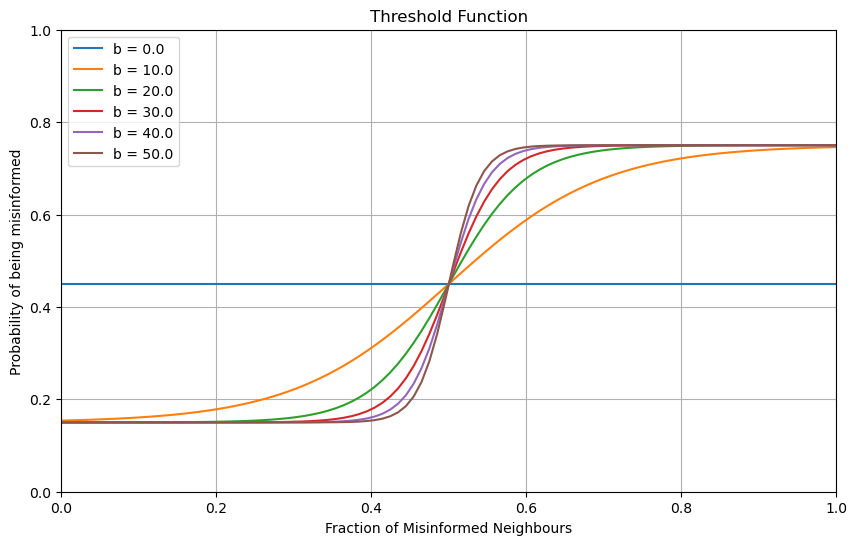

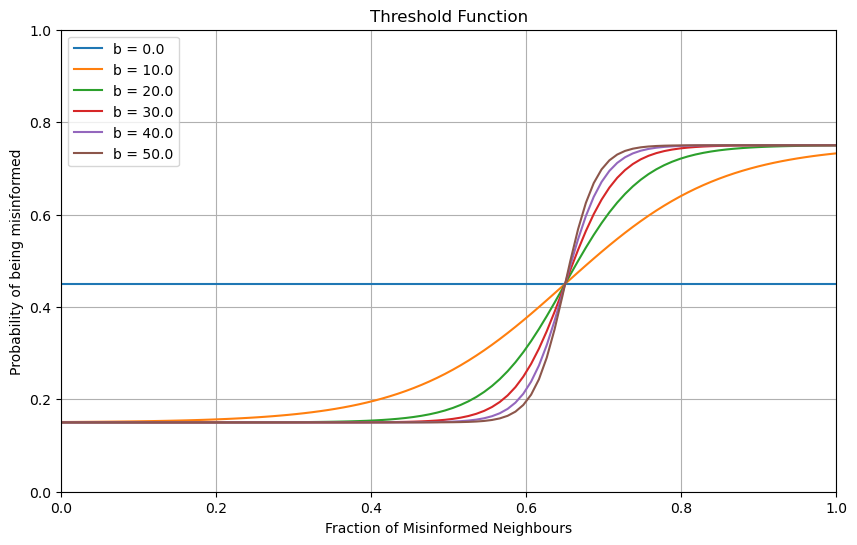

In [99]:
#Plot the threshold function as a function of fraction misinformed
def show_threshold_function(threshold=0.5):
    b = np.linspace(0, 50, 6)
    fraction_misinformed = np.linspace(0, 1, 100)
    plt.figure(figsize=(10, 6))
    for i in b:
        probability_misinformed = threshold_function(fraction_misinformed, threshold, i)
        plt.plot(fraction_misinformed, probability_misinformed, label=f'b = {i}')
    plt.xlabel('Fraction of Misinformed Neighbours')
    plt.ylabel('Probability of being misinformed')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title('Threshold Function')
    plt.legend()
    plt.grid()
    plt.show()
#Plot unbiased threshold
show_threshold_function()
#Plot threshold with bias
show_threshold_function(0.65)

#### Simulate Threshold Model: Poisson

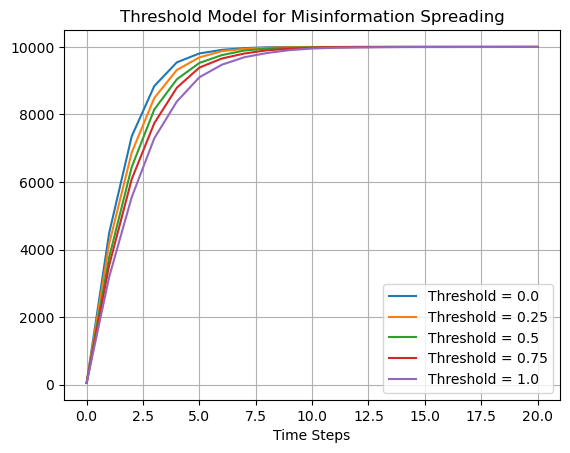

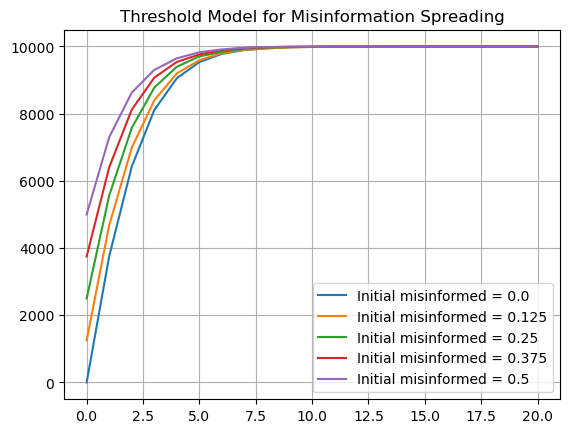

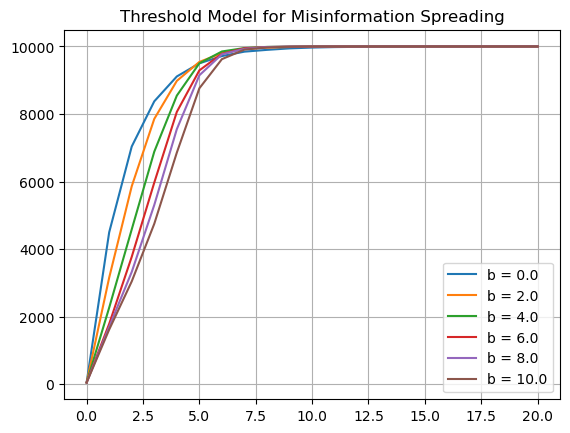

In [100]:
network = sample_configuration_poisson(10000, 20)
def plot_misinformed_for_thresholds():
    thresholds = np.linspace(0, 1, 5)
    # thresholds = [1]
    for threshold in thresholds:
        susceptible_vals, misinformed_vals = SM_process_misinformation_threshold(network, 0.005, 20, threshold, 1)
        # plt.plot(susceptible_vals, label='Susceptible ' + str(threshold))
        plt.plot(misinformed_vals, label='Threshold = ' + str(threshold))
    plt.legend()
    plt.grid()
    plt.xlabel('Time Steps')
    plt.title('Threshold Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_thresholds()
#This shows that the actual threshold value doesn't make a large difference in this model.

def plot_misinformed_for_initial_misinformed():
    initial_misinformed = np.linspace(0, 0.5, 5)
    for initial in initial_misinformed:
        susceptible_vals, misinformed_vals = SM_process_misinformation_threshold(network, initial, 20, 0.5, 1)
        plt.plot(misinformed_vals, label='Initial misinformed = ' + str(initial))
    plt.legend()
    plt.grid()
    plt.title('Threshold Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_initial_misinformed()
#This shows how to change initial conditions in the model.

def plot_misinformed_for_b():
    b_vals = np.linspace(0, 10, 6)
    for b in b_vals:
        susceptible_vals, misinformed_vals = SM_process_misinformation_threshold(network, 0.005, 20, 0.5, b)
        plt.plot(misinformed_vals, label='b = ' + str(b))
    plt.legend()
    plt.grid()
    plt.title('Threshold Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_b()


#### Simulate Threshold Model: Geometric

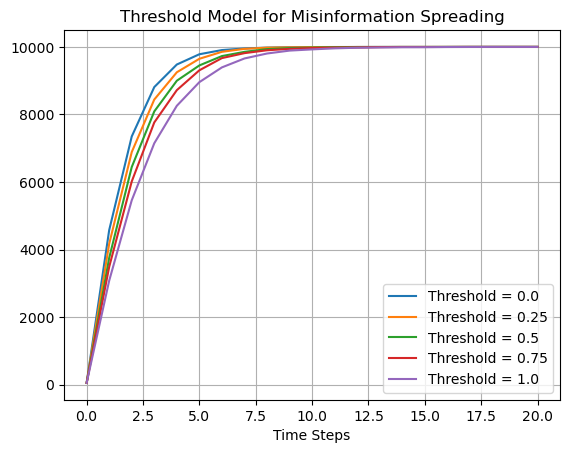

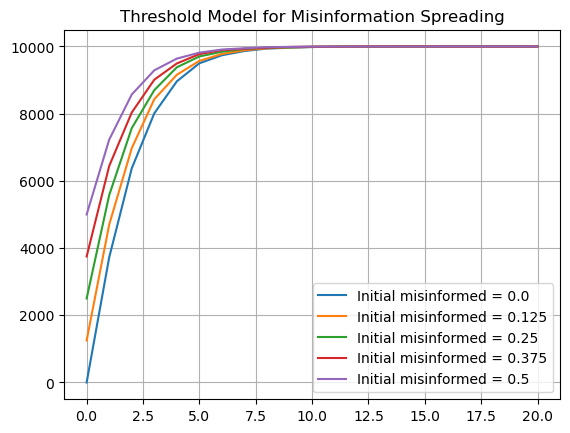

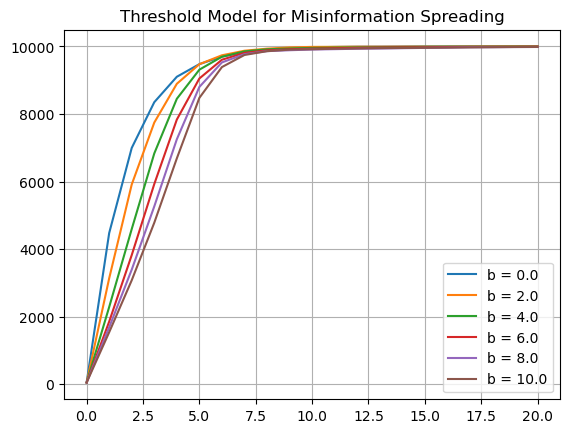

In [101]:
network = sample_configuration_geometric(10000, 1/21)
def plot_misinformed_for_thresholds():
    thresholds = np.linspace(0, 1, 5)
    # thresholds = [1]
    for threshold in thresholds:
        susceptible_vals, misinformed_vals = SM_process_misinformation_threshold(network, 0.005, 20, threshold, 1)
        # plt.plot(susceptible_vals, label='Susceptible ' + str(threshold))
        plt.plot(misinformed_vals, label='Threshold = ' + str(threshold))
    plt.legend()
    plt.grid()
    plt.xlabel('Time Steps')
    plt.title('Threshold Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_thresholds()
#This shows that the actual threshold value doesn't make a large difference in this model.

def plot_misinformed_for_initial_misinformed():
    initial_misinformed = np.linspace(0, 0.5, 5)
    for initial in initial_misinformed:
        susceptible_vals, misinformed_vals = SM_process_misinformation_threshold(network, initial, 20, 0.5, 1)
        plt.plot(misinformed_vals, label='Initial misinformed = ' + str(initial))
    plt.legend()
    plt.grid()
    plt.title('Threshold Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_initial_misinformed()
#This shows how to change initial conditions in the model.

def plot_misinformed_for_b():
    b_vals = np.linspace(0, 10, 6)
    for b in b_vals:
        susceptible_vals, misinformed_vals = SM_process_misinformation_threshold(network, 0.005, 20, 0.5, b)
        plt.plot(misinformed_vals, label='b = ' + str(b))
    plt.legend()
    plt.grid()
    plt.title('Threshold Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_b()


### ReLU Function 

#### ReLU Function: Poisson

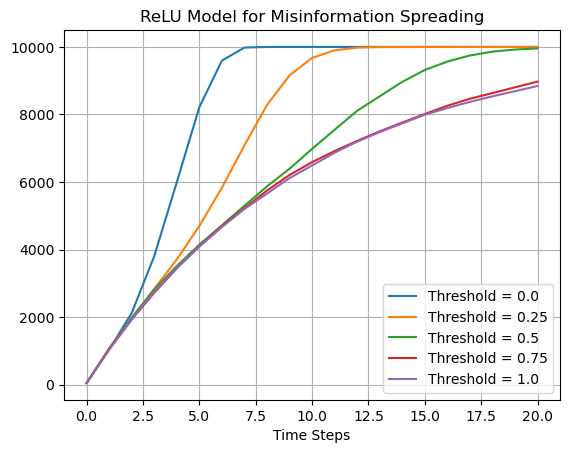

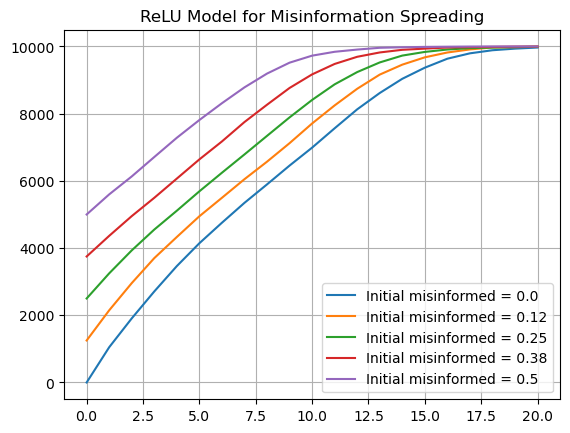

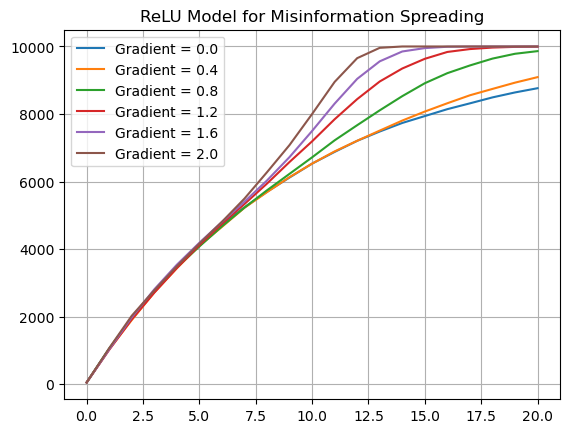

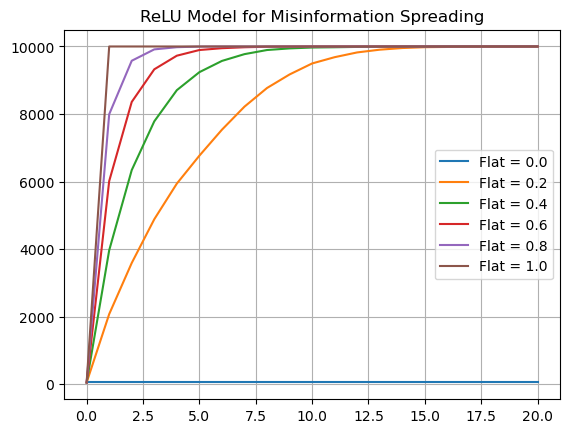

In [107]:
network_p = sample_configuration_poisson(10000, 20)
network_g = sample_configuration_geometric(10000, 1/21)

def plot_misinformed_for_thresholds_relu():
    thresholds = np.linspace(0, 1, 5)
    # thresholds = [1]
    for threshold in thresholds:
        susceptible_vals, misinformed_vals = SM_process_misinformation_ReLU(network_p, 0.005, 20, threshold, 1, 0.1)
        # plt.plot(susceptible_vals, label='Susceptible ' + str(threshold))
        plt.plot(misinformed_vals, label='Threshold = ' + str(np.round(threshold, 2)))
    plt.legend()
    plt.grid()
    plt.xlabel('Time Steps')
    plt.title('ReLU Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_thresholds_relu()

def plot_misinformed_for_initial_misinformed_relu():
    initial_misinformed = np.linspace(0, 0.5, 5)
    for initial in initial_misinformed:
        susceptible_vals, misinformed_vals = SM_process_misinformation_ReLU(network_p, initial, 20, 0.5, 1, 0.1)
        plt.plot(misinformed_vals, label='Initial misinformed = ' + str(np.round(initial, 2)))
    plt.legend()
    plt.grid()
    plt.title('ReLU Model for Misinformation Spreading')
    plt.show()    
plot_misinformed_for_initial_misinformed_relu()

def plot_misinformed_for_gradient():
    gradients = np.linspace(0, 2, 6)
    for gradient in gradients:
        susceptible_vals, misinformed_vals = SM_process_misinformation_ReLU(network_p, 0.005, 20, 0.5, gradient, 0.1)
        plt.plot(misinformed_vals, label='Gradient = ' + str(np.round(gradient, 2)))
    plt.legend()
    plt.grid()
    plt.title('ReLU Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_gradient()

def plot_misinformed_for_flat():
    flats = np.linspace(0, 1, 6)
    for flat in flats:
        susceptible_vals, misinformed_vals = SM_process_misinformation_ReLU(network_p, 0.005, 20, 0.5, 1, flat)
        plt.plot(misinformed_vals, label='Flat = ' + str(np.round(flat, 2)))
    plt.legend()
    plt.grid()
    plt.title('ReLU Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_flat()

#### ReLU Function: Geometric


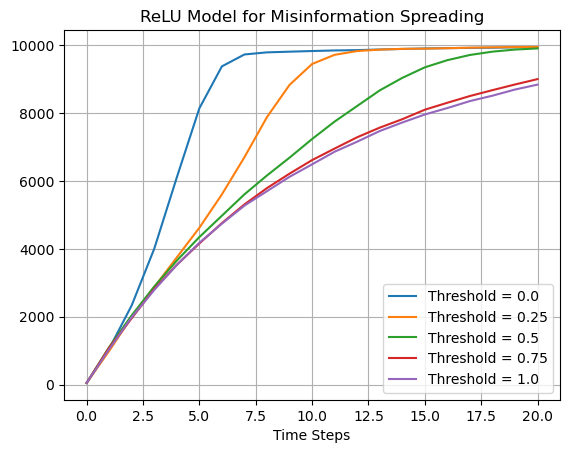

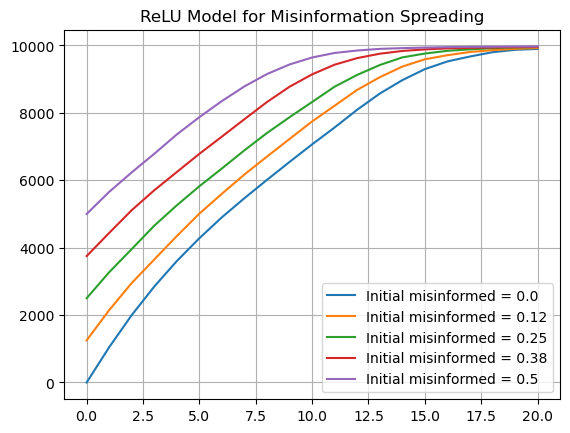

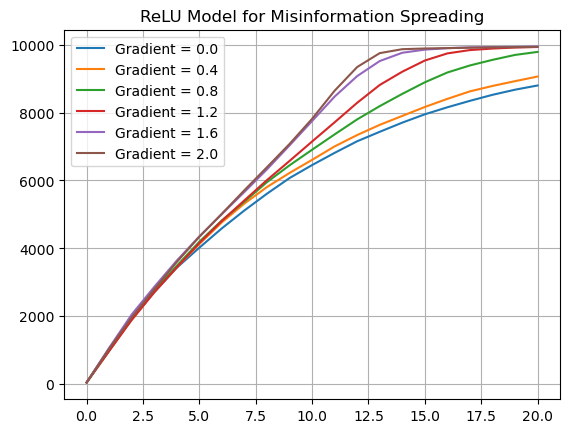

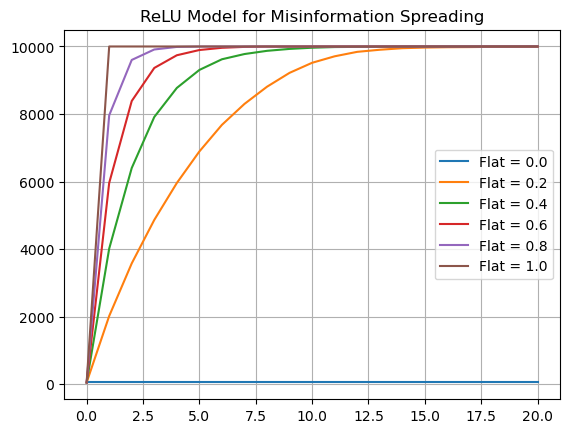

In [109]:
network_g = sample_configuration_geometric(10000, 1/21)
def plot_misinformed_for_thresholds_relu():
    thresholds = np.linspace(0, 1, 5)
    # thresholds = [1]
    for threshold in thresholds:
        susceptible_vals, misinformed_vals = SM_process_misinformation_ReLU(network_g, 0.005, 20, threshold, 1, 0.1)
        # plt.plot(susceptible_vals, label='Susceptible ' + str(threshold))
        plt.plot(misinformed_vals, label='Threshold = ' + str(np.round(threshold, 2)))
    plt.legend()
    plt.grid()
    plt.xlabel('Time Steps')
    plt.title('ReLU Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_thresholds_relu()

def plot_misinformed_for_initial_misinformed_relu():
    initial_misinformed = np.linspace(0, 0.5, 5)
    for initial in initial_misinformed:
        susceptible_vals, misinformed_vals = SM_process_misinformation_ReLU(network_g, initial, 20, 0.5, 1, 0.1)
        plt.plot(misinformed_vals, label='Initial misinformed = ' + str(np.round(initial, 2)))
    plt.legend()
    plt.grid()
    plt.title('ReLU Model for Misinformation Spreading')
    plt.show()    
plot_misinformed_for_initial_misinformed_relu()

def plot_misinformed_for_gradient():
    gradients = np.linspace(0, 2, 6)
    for gradient in gradients:
        susceptible_vals, misinformed_vals = SM_process_misinformation_ReLU(network_g, 0.005, 20, 0.5, gradient, 0.1)
        plt.plot(misinformed_vals, label='Gradient = ' + str(np.round(gradient, 2)))
    plt.legend()
    plt.grid()
    plt.title('ReLU Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_gradient()

def plot_misinformed_for_flat():
    flats = np.linspace(0, 1, 6)
    for flat in flats:
        susceptible_vals, misinformed_vals = SM_process_misinformation_ReLU(network_g, 0.005, 20, 0.5, 1, flat)
        plt.plot(misinformed_vals, label='Flat = ' + str(np.round(flat, 2)))
    plt.legend()
    plt.grid()
    plt.title('ReLU Model for Misinformation Spreading')
    plt.show()
plot_misinformed_for_flat()

### Model with Vaccination Analogue. 
This model implements a vaccination analogue where misinformed people are informed. Experiment and observe whether informing at random is more/less effective than informing friends of random nodes.

* Implement this model
* Obtain graphs evidencing the effects of things explored in weeks 1-4
* Write up introduction to report